# Data Analyst Project : Business Decision Research About Features & PaidStarPerWatchedHour

## Load Library

In [445]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

## Data Collection

### Load Dataset

In [446]:
dataset = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Python\MyProjects\MAINGAMES Data Analyst\Dataset\Maingames_DS_dataset.csv")
display(dataset.head())

,Unnamed: 0,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,0,ID,Male,MLBB,96751,104,0.004113,0.663442,0.718679,0.288008,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,1,ID,Male,8 Ball Pool,4781,174,0.002855,0.543255,0.427887,0.430609,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,2,ID,Female,Free Fire - Battlegrounds,68246,83,0.003007,0.527279,0.399873,0.753009,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,3,ID,Male,MLBB,142037,127,0.005171,0.677222,0.603534,0.407923,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,4,ID,Male,Free Fire - Battlegrounds,15416,86,0.001213,0.238194,0.543285,0.392993,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125


## Data Preparation

### Dataset Eksploration

In [447]:
print("Dimension of Dataset = %d Rows & %d Columns"%dataset.shape)

Dimension of Dataset = 631 Rows & 127 Columns


### Handling Missing Value

In [448]:
print("Checks Existing of Missing Value Dataset = ?")

missing_values_columns = dataset.columns[dataset.isnull().any()].to_list()
total_missing_values = dataset.isnull().sum().sum()

display(missing_values_columns)
display(total_missing_values)

Checks Existing of Missing Value Dataset = ?


['Gender',
 'Game',
 'Total Follower',
 'PaidStarPerWatchedHour',
 'PaidStarPerWatchedHour.1']

8

In [449]:
dataset = dataset.dropna(subset=missing_values_columns)

print("Checks Existing of Missing Value Dataset = ?")

missing_values_columns = dataset.columns[dataset.isnull().any()].to_list()
total_missing_values = dataset.isnull().sum().sum()

display(missing_values_columns)
display(total_missing_values)

Checks Existing of Missing Value Dataset = ?


[]

0

### Drop Useless Columns

In [450]:
useless_columns = ["Unnamed: 0","PaidStarPerWatchedHour.1"]
dataset = dataset.drop(useless_columns, axis=1)

print("Dimension of Dataset = %d Rows & %d Columns"%dataset.shape)

Dimension of Dataset = 626 Rows & 125 Columns


### Drop Rows Thah Have String "-"

In [451]:
dataset = dataset.drop([450, 508, 534, 439])

### Drop Rows That Have String "250,98"

In [452]:
dataset = dataset.drop([576])

### Reset Index Dataset

In [453]:
dataset = dataset.reset_index(drop=True)

### Split The Columns Into Several Segments

#### Making Label DataFrame

In [454]:
Label = dataset[["PaidStarPerWatchedHour"]]
display(Label.head())

,PaidStarPerWatchedHour
0,0.004113
1,0.002855
2,0.003007
3,0.005171
4,0.001213


#### Making Features DataFrame

In [455]:
Features = dataset.drop(["PaidStarPerWatchedHour"], axis=1)
display(Features.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,Character_Cont_Conscientiousness,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,ID,Male,MLBB,96751,104,0.663442,0.718679,0.288008,0.471456,0.522711,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,ID,Male,8 Ball Pool,4781,174,0.543255,0.427887,0.430609,0.493514,0.348513,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,ID,Female,Free Fire - Battlegrounds,68246,83,0.527279,0.399873,0.753009,0.472405,0.376854,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,ID,Male,MLBB,142037,127,0.677222,0.603534,0.407923,0.467787,0.499234,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,ID,Male,Free Fire - Battlegrounds,15416,86,0.238194,0.543285,0.392993,0.583099,0.469371,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125


#### Split The Features Into Several Segements

In [456]:
Features_columns = Features.columns.to_list()

In [457]:
Character_columns = []
Personal_columns = []
Temperament_columns = []
Self_columns = []
Role_columns = []
Core_columns = []

for column in Features_columns:
    if column.startswith("Character"):
        Character_columns.append(column)
    elif column.startswith("Personal"):
        Personal_columns.append(column)
    elif column.startswith("Temperament"):
        Temperament_columns.append(column)
    elif column.startswith("Self"):
        Self_columns.append(column)
    elif column.startswith("Role"):
        Role_columns.append(column)
    else:
        Core_columns.append(column)

In [458]:
display(len(Character_columns))
display(len(Personal_columns))
display(len(Temperament_columns))
display(len(Self_columns))
display(len(Role_columns))
display(len(Core_columns))

30

23

9

24

32

6

## Data Analysis

### Data Analysis : df_Core_columns 

In [459]:
df_Core_columns = Features[Core_columns]

display(df_Core_columns.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped
0,ID,Male,MLBB,96751,104,INT
1,ID,Male,8 Ball Pool,4781,174,INT
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST
3,ID,Male,MLBB,142037,127,ENT
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF


#### Checking df_Core_columns Informations

In [460]:
print("Dimension of df_Core_dataset = %d Rows & %d Columns"%df_Core_columns.shape)
print("Checking df_Core_columns Information = ?")
display(df_Core_columns.info())
print("Checks Existing of Missing Value = ?")
display(df_Core_columns.isnull().sum())

Dimension of df_Core_dataset = 621 Rows & 6 Columns
Checking df_Core_columns Information = ?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          621 non-null    object
 1   Gender           621 non-null    object
 2   Game             621 non-null    object
 3   Total Follower   621 non-null    object
 4   Broadcast Hours  621 non-null    int64 
 5   MBTI_grouped     621 non-null    object
dtypes: int64(1), object(5)
memory usage: 29.2+ KB


None

Checks Existing of Missing Value = ?


Country            0
Gender             0
Game               0
Total Follower     0
Broadcast Hours    0
MBTI_grouped       0
dtype: int64

#### Change Column "Total Follower" Types

In [461]:
# _list_strip = []
# df_Core_columns_column = df_Core_columns.columns.to_list()
# for i, column in enumerate(df_Core_columns_column):
#     x = df_Core_columns.loc[df_Core_columns[column] == "-"].index.to_list()
#     _list_strip.extend(x)

# _list_strip = list(set(_list_strip))
# display(_list_strip)

In [462]:
# x = df_Core_columns.loc[df_Core_columns["Total Follower"] == '250,98']
# display(x)

In [463]:
df_Core_columns = df_Core_columns.astype({"Total Follower":"int64"})
display(df_Core_columns.dtypes)

Country            object
Gender             object
Game               object
Total Follower      int64
Broadcast Hours     int64
MBTI_grouped       object
dtype: object

#### Making PaidStarPerWatchedHour Columns in df_Core_columns

In [464]:
df_Core = df_Core_columns.copy()
display(df_Core.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped
0,ID,Male,MLBB,96751,104,INT
1,ID,Male,8 Ball Pool,4781,174,INT
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST
3,ID,Male,MLBB,142037,127,ENT
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF


In [465]:
display(Label.head())

,PaidStarPerWatchedHour
0,0.004113
1,0.002855
2,0.003007
3,0.005171
4,0.001213


In [466]:
df_Core = df_Core.join(Label)

In [467]:
display(df_Core.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped,PaidStarPerWatchedHour
0,ID,Male,MLBB,96751,104,INT,0.004113
1,ID,Male,8 Ball Pool,4781,174,INT,0.002855
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST,0.003007
3,ID,Male,MLBB,142037,127,ENT,0.005171
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF,0.001213


#### Data Analysis : Correlation Gender & Label

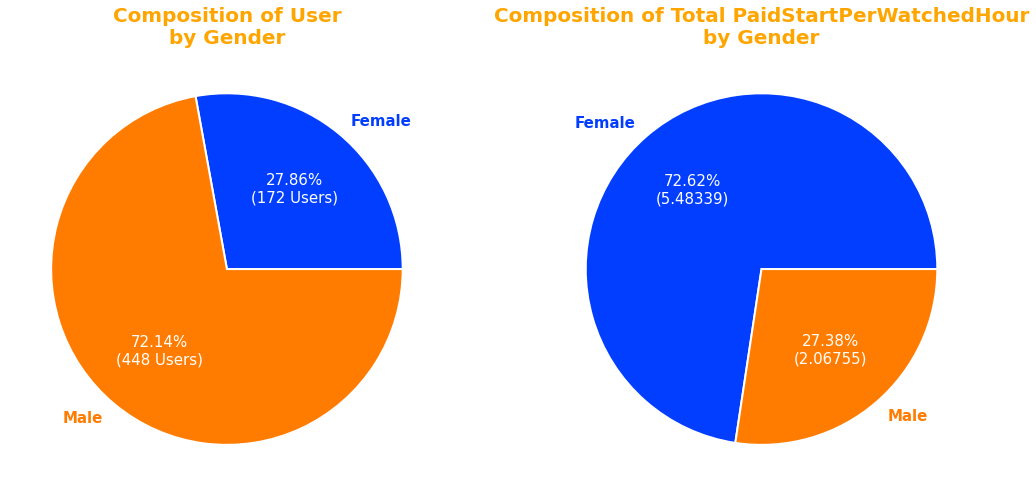

In [468]:
Gender_PaidStartPerWatchedHour = ["Gender","PaidStarPerWatchedHour"]
df_Gender_PaidStartPerWatchedHour = df_Core.groupby(["Gender"]).agg({
                                                                                            "Gender":"count",
                                                                                            "PaidStarPerWatchedHour":"sum"
                                                                                          })
# display(df_Gender_PaidStartPerWatchedHour["Gender"])
# display(df_Gender_PaidStartPerWatchedHour["PaidStarPerWatchedHour"])

def autopct(pct, data, column):
  if column == "Gender":
    absolute_value = int(pct/100*np.sum(data))
    return "{:0.2f}%\n({:d} Users)".format(pct, absolute_value)
  else:
    absolute_value = float(pct/100*np.sum(data))
    return "{:0.2f}%\n({:0.5f})".format(pct, absolute_value)

palette = sns.color_palette("bright")

fig, axs = plt.subplots(1,2, figsize=(15, 7))
for i, column in enumerate(Gender_PaidStartPerWatchedHour):
    patches, texts, pcts = axs[i].pie(
                                      x=df_Gender_PaidStartPerWatchedHour[column],
                                      labels=df_Gender_PaidStartPerWatchedHour.index,
                                      autopct=lambda pct:autopct(pct, df_Gender_PaidStartPerWatchedHour[column], column),
                                      textprops={
                                                 "size" : 15,
                                                 "color" : "white"
                                                },
                                      wedgeprops={
                                                 "linewidth" : 2,
                                                 "edgecolor" : "white"
                                                },
                                      colors=palette
                                     )
    for y, patch in enumerate(patches):
      texts[y].set_color(patch.get_facecolor())

    axs[0].set_title("Composition of User\nby Gender",fontsize=20, fontweight="bold", color="orange")
    axs[1].set_title("Composition of Total PaidStartPerWatchedHour\nby Gender",fontsize=20, fontweight="bold", color="orange")

    plt.setp(texts, fontweight="bold")
    
plt.tight_layout()
plt.show()

#### Data Analysis : Correlation Country & Label

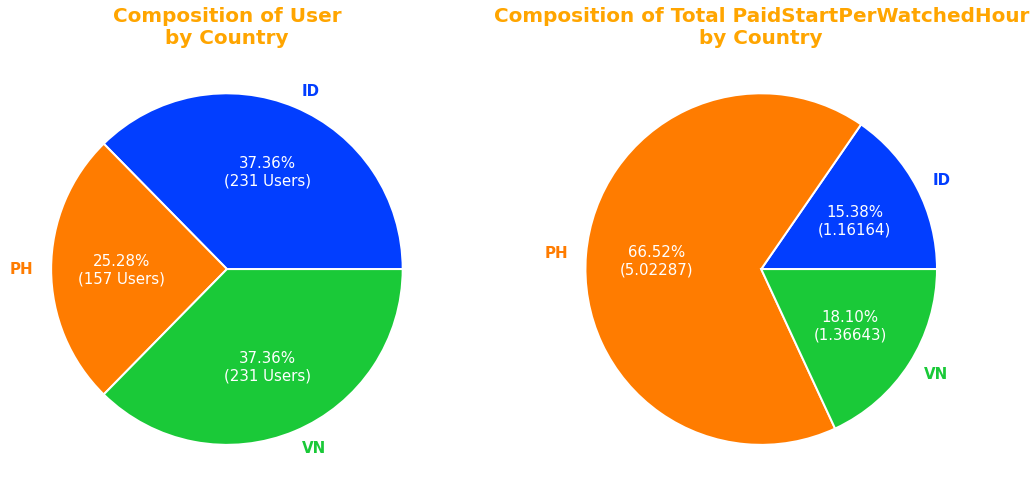

In [469]:
Country_PaidStartPerWatchedHour = ["Country","PaidStarPerWatchedHour"]
df_Country_PaidStartPerWatchedHour = df_Core.groupby(["Country"]).agg({
                                                                                            "Country":"count",
                                                                                            "PaidStarPerWatchedHour":"sum"
                                                                                          })
# display(df_Country_PaidStartPerWatchedHour["Country"])
# display(df_Country_PaidStartPerWatchedHour["PaidStarPerWatchedHour"])

def autopct(pct, data, column):
  if column == "Country":
    absolute_value = int(pct/100*np.sum(data))
    return "{:0.2f}%\n({:d} Users)".format(pct, absolute_value)
  else:
    absolute_value = float(pct/100*np.sum(data))
    return "{:0.2f}%\n({:0.5f})".format(pct, absolute_value)

palette = sns.color_palette("bright")

fig, axs = plt.subplots(1,2, figsize=(15, 7))
for i, column in enumerate(Country_PaidStartPerWatchedHour):
    patches, texts, pcts = axs[i].pie(
                                      x=df_Country_PaidStartPerWatchedHour[column],
                                      labels=df_Country_PaidStartPerWatchedHour.index,
                                      autopct=lambda pct:autopct(pct, df_Country_PaidStartPerWatchedHour[column], column),
                                      textprops={
                                                 "size" : 15,
                                                 "color" : "white"
                                                },
                                      wedgeprops={
                                                 "linewidth" : 2,
                                                 "edgecolor" : "white"
                                                },
                                      colors=palette
                                     )
    for y, patch in enumerate(patches):
      texts[y].set_color(patch.get_facecolor())

    axs[0].set_title("Composition of User\nby Country",fontsize=20, fontweight="bold", color="orange")
    axs[1].set_title("Composition of Total PaidStartPerWatchedHour\nby Country",fontsize=20, fontweight="bold", color="orange")

    plt.setp(texts, fontweight="bold")
    
plt.tight_layout()
plt.show()

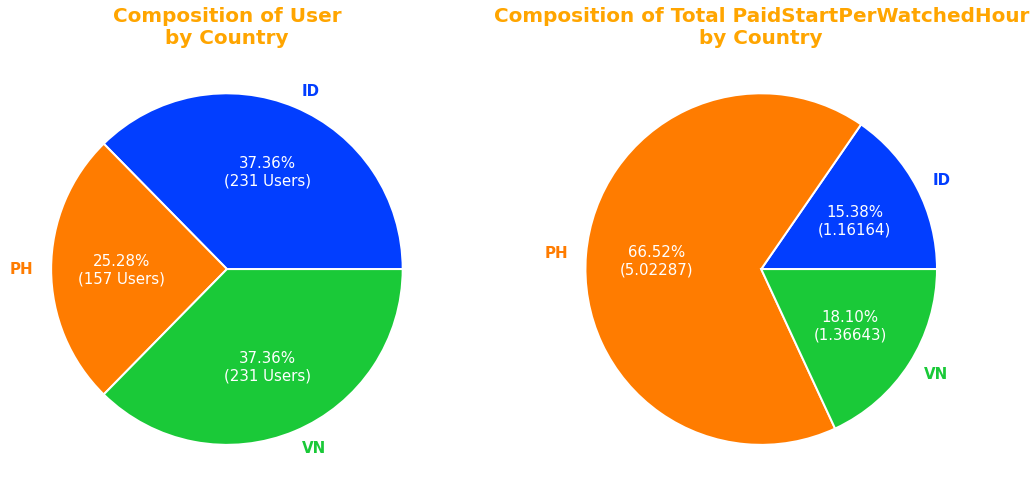

In [470]:
Country_PaidStartPerWatchedHour = ["Country","PaidStarPerWatchedHour"]
df_Country_PaidStartPerWatchedHour = df_Core.groupby(["Country"]).agg({
                                                                                            "Country":"count",
                                                                                            "PaidStarPerWatchedHour":"sum"
                                                                                          })
# display(df_Country_PaidStartPerWatchedHour["Country"])
# display(df_Country_PaidStartPerWatchedHour["PaidStarPerWatchedHour"])

def autopct(pct, data, column):
  if column == "Country":
    absolute_value = int(pct/100*np.sum(data))
    return "{:0.2f}%\n({:d} Users)".format(pct, absolute_value)
  else:
    absolute_value = float(pct/100*np.sum(data))
    return "{:0.2f}%\n({:0.5f})".format(pct, absolute_value)

palette = sns.color_palette("bright")

fig, axs = plt.subplots(1,2, figsize=(15, 7))
for i, column in enumerate(Country_PaidStartPerWatchedHour):
    patches, texts, pcts = axs[i].pie(
                                      x=df_Country_PaidStartPerWatchedHour[column],
                                      labels=df_Country_PaidStartPerWatchedHour.index,
                                      autopct=lambda pct:autopct(pct, df_Country_PaidStartPerWatchedHour[column], column),
                                      textprops={
                                                 "size" : 15,
                                                 "color" : "white"
                                                },
                                      wedgeprops={
                                                 "linewidth" : 2,
                                                 "edgecolor" : "white"
                                                },
                                      colors=palette
                                     )
    for y, patch in enumerate(patches):
      texts[y].set_color(patch.get_facecolor())

    axs[0].set_title("Composition of User\nby Country",fontsize=20, fontweight="bold", color="orange")
    axs[1].set_title("Composition of Total PaidStartPerWatchedHour\nby Country",fontsize=20, fontweight="bold", color="orange")

    plt.setp(texts, fontweight="bold")
    
plt.tight_layout()
plt.show()

#### Data Analysis : Correlation Game & Label

In [471]:
df_Core_games_star = df_Core.copy()
display(df_Core_games_star.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped,PaidStarPerWatchedHour
0,ID,Male,MLBB,96751,104,INT,0.004113
1,ID,Male,8 Ball Pool,4781,174,INT,0.002855
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST,0.003007
3,ID,Male,MLBB,142037,127,ENT,0.005171
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF,0.001213


In [472]:
df_top_game_star = df_Core_games_star.groupby(["Game"])["PaidStarPerWatchedHour"].sum().reset_index().sort_values(by="PaidStarPerWatchedHour", ascending=False).head(10)
display(df_top_game_star)

,Game,PaidStarPerWatchedHour
32,League of Legends,3.182587
36,MLBB,1.421890
45,PUBG,0.812526
20,Dota 2,0.375952
3,Apex Legends,0.296917
58,Valorant,0.218816
28,Grand Theft Auto V,0.179609
25,Free Fire - Battlegrounds,0.117478
29,Green Hell,0.105561
4,Arena of Valor,0.094968


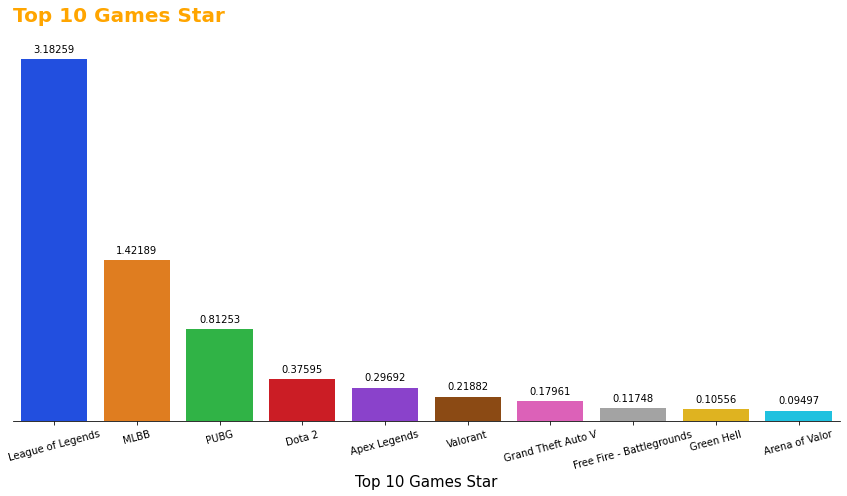

In [473]:
fig, axs = plt.subplots(figsize=(12, 7))
palette = sns.color_palette("bright")
sns.barplot(data=df_top_game_star, x="Game", y="PaidStarPerWatchedHour", palette=palette, ax=axs)
axs.set_title("Top 10 Games Star", fontsize=20, fontweight="bold",color="orange", loc="left", pad=20)
axs.set_xticklabels(axs.get_xticklabels(), rotation=15)
axs.set_xlabel("Top 10 Games Star", fontsize=15)
axs.yaxis.set_visible(False)
axs.set_ylabel(None)
for p in axs.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    axs.annotate(
                 "{:0.5f}".format(height),
                 xy=(x + width/2, height),
                 ha="center",
                 va="center",
                 xytext=(0, 10),
                 textcoords="offset points"
                )
sns.despine(left=True, top=True, right=True)
plt.tight_layout()
plt.show()

In [474]:
df_Core_games = df_Core.copy()
display(df_Core_games.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped,PaidStarPerWatchedHour
0,ID,Male,MLBB,96751,104,INT,0.004113
1,ID,Male,8 Ball Pool,4781,174,INT,0.002855
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST,0.003007
3,ID,Male,MLBB,142037,127,ENT,0.005171
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF,0.001213


##### Making Features top_17_games_popular

In [475]:
top_17_games_popular_columns = df_Core_games["Game"].value_counts().head(17).index.to_list()
display(top_17_games_popular_columns)

['MLBB',
 'PUBG',
 'Free Fire - Battlegrounds',
 'Arena of Valor',
 'League of Legends',
 'Age of Empires',
 'Grand Theft Auto V',
 'Dota 2',
 'Crossfire',
 'Worms Zone',
 'Garena Liên Quân Mobile',
 'Valorant',
 'Wormate.io',
 'Euro Truck Simulator 2',
 'Counter-Strike: Global Offensive',
 'Coin Master',
 'eFootball PES 2020']

In [476]:
df_Core_games["top_17_games"] = df_Core_games["Game"].apply(lambda x : x if x in top_17_games_popular_columns else "Unpopular Game")
display(df_Core_games.head(10))

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped,PaidStarPerWatchedHour,top_17_games
0,ID,Male,MLBB,96751,104,INT,0.004113,MLBB
1,ID,Male,8 Ball Pool,4781,174,INT,0.002855,Unpopular Game
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST,0.003007,Free Fire - Battlegrounds
3,ID,Male,MLBB,142037,127,ENT,0.005171,MLBB
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF,0.001213,Free Fire - Battlegrounds
5,ID,Male,PUBG,8993,136,ENT,0.003492,PUBG
6,ID,Male,8 Ball Pool,3477,96,ENT,0.001151,Unpopular Game
7,ID,Male,PUBG,9321,150,ENT,0.013541,PUBG
8,ID,Female,MLBB,21967,92,IST,0.001085,MLBB
9,ID,Female,Free Fire - Battlegrounds,67213,171,IST,0.002285,Free Fire - Battlegrounds


In [477]:
df_Core_top_17_games = df_Core_games.groupby(["top_17_games"]).agg({
                                                                    "top_17_games":"count",
                                                                    "PaidStarPerWatchedHour":"sum"
                                                                  }).rename(columns={"top_17_games":"count_games"}).sort_values(by="count_games", ascending=False).reset_index()
display(df_Core_top_17_games.head(18)) 

,top_17_games,count_games,PaidStarPerWatchedHour
0,MLBB,150,1.421890
1,PUBG,117,0.812526
2,Unpopular Game,83,0.822428
3,Free Fire - Battlegrounds,49,0.117478
4,Arena of Valor,42,0.094968
5,League of Legends,39,3.182587
6,Age of Empires,26,0.047965
7,Grand Theft Auto V,18,0.179609
8,Dota 2,14,0.375952
9,Crossfire,13,0.044810


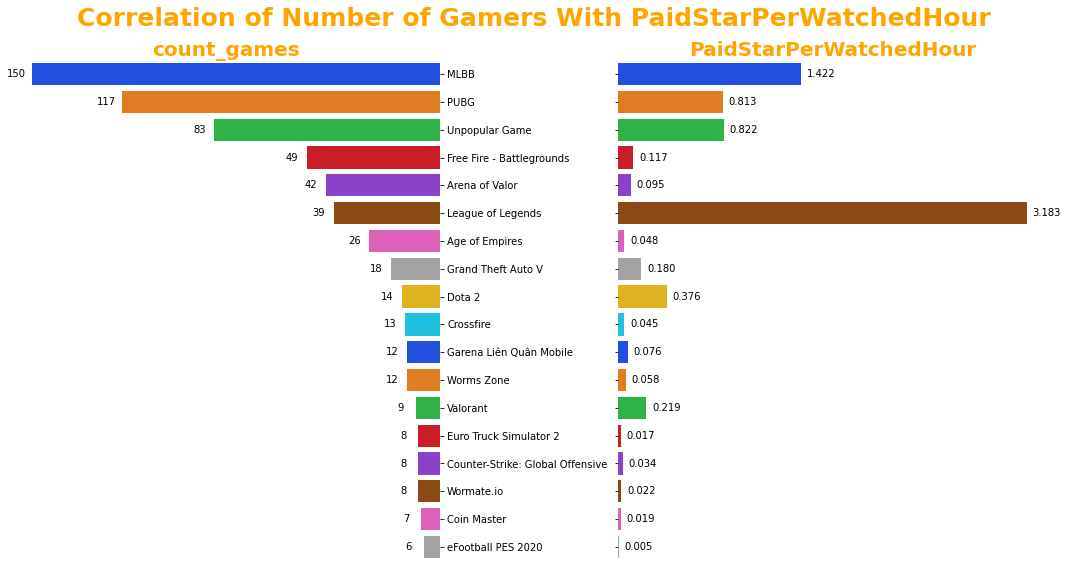

In [478]:
df_Core_top_17_games_columns = ["count_games","PaidStarPerWatchedHour"]
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 8))
fig.suptitle("Correlation of Number of Gamers With PaidStarPerWatchedHour", fontsize=25, fontweight="bold", color="orange")
for i, column in enumerate(df_Core_top_17_games_columns):
    sns.barplot(data=df_Core_top_17_games, x=column, y="top_17_games",palette="bright", ax=axs[i])
    axs[i].tick_params(labelbottom=False, bottom=False)
    if i == 0:
        axs[i].set_xlim(reversed(axs[i].get_xlim()))
        axs[i].yaxis.tick_right()
    axs[i].xaxis.set_label_position("top")
    axs[i].set_xlabel(column, fontsize=20, fontweight="bold", color="orange")
    axs[i].set_ylabel(None)

    for p in axs[i].patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x()
        y = p.get_y()
        if i == 0:
            axs[i].annotate(
                            int(width),
                            xy=(width, y+height/2),
                            ha="center",
                            va="center",
                            xytext=(-15, 0),
                            textcoords="offset points"
                            )
        else:
            axs[i].annotate(
                            "{:0.3f}".format(width),
                            xy=(width, y+height/2),
                            ha="center",
                            va="center",
                            xytext=(20, 0),
                            textcoords="offset points"
                            )
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

#### Data Analysis : Correlation MBTI_Grouped & Label

In [479]:
df_MBTI_grouped = df_Core.copy()
display(df_MBTI_grouped.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped,PaidStarPerWatchedHour
0,ID,Male,MLBB,96751,104,INT,0.004113
1,ID,Male,8 Ball Pool,4781,174,INT,0.002855
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST,0.003007
3,ID,Male,MLBB,142037,127,ENT,0.005171
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF,0.001213


In [480]:
list_mbti_grouped = df_MBTI_grouped["MBTI_grouped"].value_counts().index.to_list()
display(list_mbti_grouped)

['ENT', 'IST', 'INT', 'INF', 'EST', 'ENF', 'ISF', 'ESF']

In [481]:
introvert_features = []
ekstrovert_features = []
sensing_features = []
intuition_features = []
thinking_features = []
feeling_features = []

for k in list_mbti_grouped:
    if ~(k.find("E")):
        ekstrovert_features.append(k)
    else:
        introvert_features.append(k)

for k in list_mbti_grouped:
    if k.find("S") == 1:
        sensing_features.append(k)
    else:
        intuition_features.append(k)

for k in list_mbti_grouped:
    if k.find("T") == 2:
        thinking_features.append(k)
    else:
        feeling_features.append(k)

display(introvert_features)
display(ekstrovert_features)
display(sensing_features)
display(intuition_features)
display(thinking_features)
display(feeling_features)


['IST', 'INT', 'INF', 'ISF']

['ENT', 'EST', 'ENF', 'ESF']

['IST', 'EST', 'ISF', 'ESF']

['ENT', 'INT', 'INF', 'ENF']

['ENT', 'IST', 'INT', 'EST']

['INF', 'ENF', 'ISF', 'ESF']

In [482]:
df_MBTI_grouped["introvert_vs_ekstrovert"] = df_MBTI_grouped["MBTI_grouped"].apply(lambda x : "introvert" if x in introvert_features else "ekstrovert")
df_MBTI_grouped["sensing_vs_intuition"] = df_MBTI_grouped["MBTI_grouped"].apply(lambda x : "sensing" if x in sensing_features else "intuition")
df_MBTI_grouped["thinking_vs_feeling"] = df_MBTI_grouped["MBTI_grouped"].apply(lambda x : "thinking" if x in thinking_features else "feeling")

In [483]:
display(df_MBTI_grouped.head(10))

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped,PaidStarPerWatchedHour,introvert_vs_ekstrovert,sensing_vs_intuition,thinking_vs_feeling
0,ID,Male,MLBB,96751,104,INT,0.004113,introvert,intuition,thinking
1,ID,Male,8 Ball Pool,4781,174,INT,0.002855,introvert,intuition,thinking
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST,0.003007,introvert,sensing,thinking
3,ID,Male,MLBB,142037,127,ENT,0.005171,ekstrovert,intuition,thinking
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF,0.001213,introvert,sensing,feeling
5,ID,Male,PUBG,8993,136,ENT,0.003492,ekstrovert,intuition,thinking
6,ID,Male,8 Ball Pool,3477,96,ENT,0.001151,ekstrovert,intuition,thinking
7,ID,Male,PUBG,9321,150,ENT,0.013541,ekstrovert,intuition,thinking
8,ID,Female,MLBB,21967,92,IST,0.001085,introvert,sensing,thinking
9,ID,Female,Free Fire - Battlegrounds,67213,171,IST,0.002285,introvert,sensing,thinking


In [484]:
df_MBTI_grouped_IE = df_MBTI_grouped.groupby(["introvert_vs_ekstrovert"]).agg({
                                                                                    "introvert_vs_ekstrovert":"count",
                                                                                    "PaidStarPerWatchedHour":"sum"
                                                                                  }).rename(columns={"introvert_vs_ekstrovert":"I_vs_E"})

df_MBTI_grouped_SN = df_MBTI_grouped.groupby(["sensing_vs_intuition"]).agg({
                                                                                    "sensing_vs_intuition":"count",
                                                                                    "PaidStarPerWatchedHour":"sum"
                                                                                  }).rename(columns={"sensing_vs_intuition":"S_vs_N"})

df_MBTI_grouped_TF = df_MBTI_grouped.groupby(["thinking_vs_feeling"]).agg({
                                                                                    "thinking_vs_feeling":"count",
                                                                                    "PaidStarPerWatchedHour":"sum"
                                                                                  }).rename(columns={"thinking_vs_feeling":"T_vs_F"})


display(df_MBTI_grouped_IE)
display(df_MBTI_grouped_SN)
display(df_MBTI_grouped_TF)

,I_vs_E,PaidStarPerWatchedHour
introvert_vs_ekstrovert,,
ekstrovert,297,1.504794
introvert,324,6.046141


,S_vs_N,PaidStarPerWatchedHour
sensing_vs_intuition,,
intuition,437,2.906462
sensing,184,4.644472


,T_vs_F,PaidStarPerWatchedHour
thinking_vs_feeling,,
feeling,29,0.270925
thinking,592,7.280009


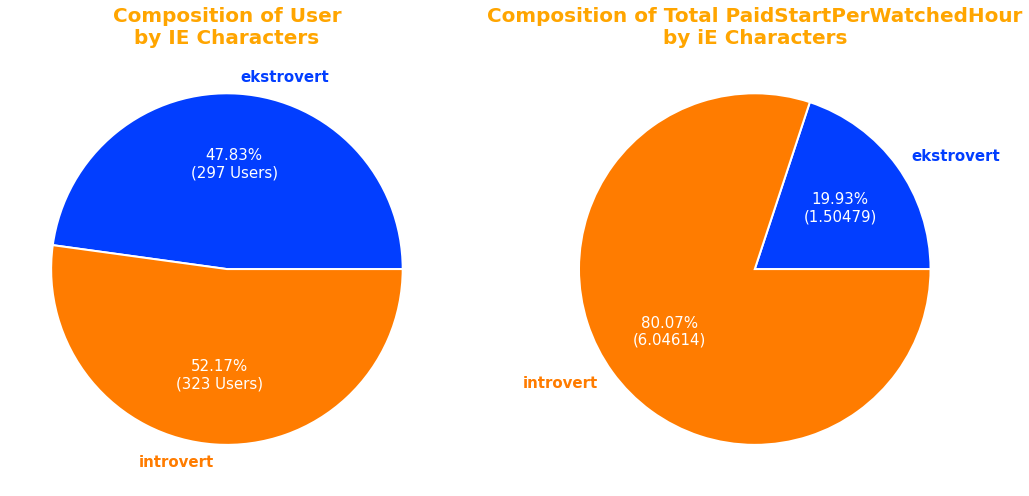

In [485]:
I_vs_E_list = ["I_vs_E","PaidStarPerWatchedHour"]

def autopct(pct, data, column):
  if column == "I_vs_E":
    absolute_value = int(pct/100*np.sum(data))
    return "{:0.2f}%\n({:d} Users)".format(pct, absolute_value)
  else:
    absolute_value = float(pct/100*np.sum(data))
    return "{:0.2f}%\n({:0.5f})".format(pct, absolute_value)

palette = sns.color_palette("bright")

fig, axs = plt.subplots(1,2, figsize=(15, 7))
for i, column in enumerate(I_vs_E_list):
    patches, texts, pcts = axs[i].pie(
                                      x=df_MBTI_grouped_IE[column],
                                      labels=df_MBTI_grouped_IE.index,
                                      autopct=lambda pct:autopct(pct, df_MBTI_grouped_IE[column], column),
                                      textprops={
                                                 "size" : 15,
                                                 "color" : "white"
                                                },
                                      wedgeprops={
                                                 "linewidth" : 2,
                                                 "edgecolor" : "white"
                                                },
                                      colors=palette
                                     )
    for y, patch in enumerate(patches):
      texts[y].set_color(patch.get_facecolor())

    axs[0].set_title("Composition of User\nby IE Characters",fontsize=20, fontweight="bold", color="orange")
    axs[1].set_title("Composition of Total PaidStartPerWatchedHour\nby iE Characters",fontsize=20, fontweight="bold", color="orange")

    plt.setp(texts, fontweight="bold")
    
plt.tight_layout()
plt.show()

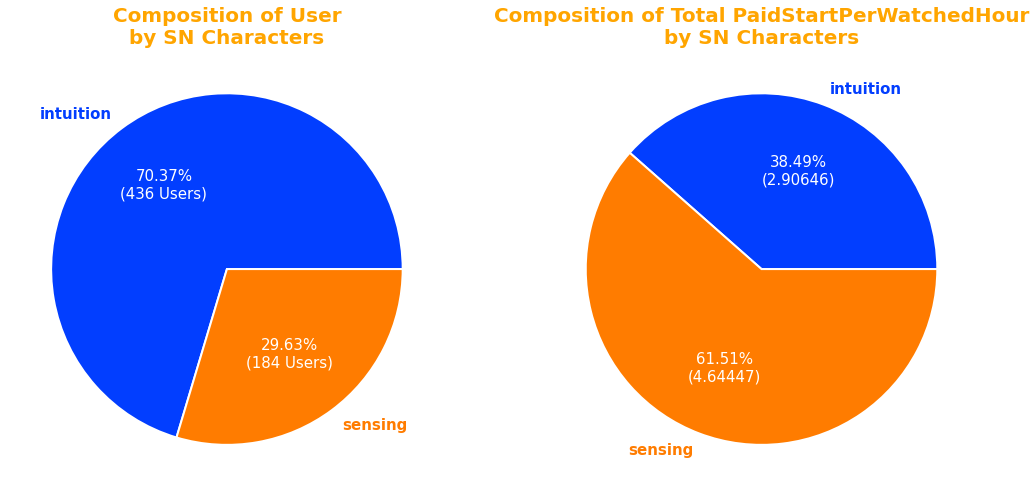

In [486]:
S_vs_N_list = ["S_vs_N","PaidStarPerWatchedHour"]

def autopct(pct, data, column):
  if column == "S_vs_N":
    absolute_value = int(pct/100*np.sum(data))
    return "{:0.2f}%\n({:d} Users)".format(pct, absolute_value)
  else:
    absolute_value = float(pct/100*np.sum(data))
    return "{:0.2f}%\n({:0.5f})".format(pct, absolute_value)

palette = sns.color_palette("bright")

fig, axs = plt.subplots(1,2, figsize=(15, 7))
for i, column in enumerate(S_vs_N_list):
    patches, texts, pcts = axs[i].pie(
                                      x=df_MBTI_grouped_SN[column],
                                      labels=df_MBTI_grouped_SN.index,
                                      autopct=lambda pct:autopct(pct, df_MBTI_grouped_SN[column], column),
                                      textprops={
                                                 "size" : 15,
                                                 "color" : "white"
                                                },
                                      wedgeprops={
                                                 "linewidth" : 2,
                                                 "edgecolor" : "white"
                                                },
                                      colors=palette
                                     )
    for y, patch in enumerate(patches):
      texts[y].set_color(patch.get_facecolor())

    axs[0].set_title("Composition of User\nby SN Characters",fontsize=20, fontweight="bold", color="orange")
    axs[1].set_title("Composition of Total PaidStartPerWatchedHour\nby SN Characters",fontsize=20, fontweight="bold", color="orange")

    plt.setp(texts, fontweight="bold")
    
plt.tight_layout()
plt.show()

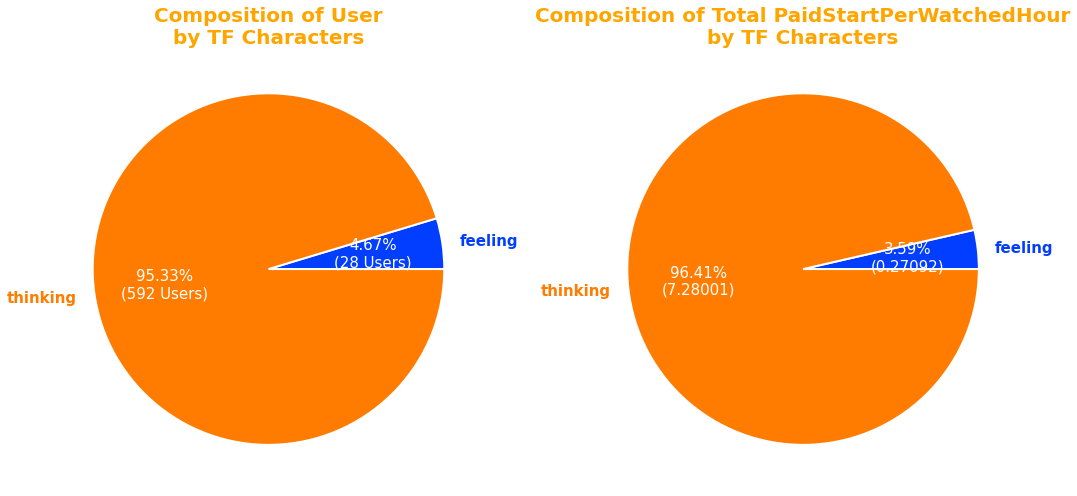

In [487]:
T_vs_F_list = ["T_vs_F","PaidStarPerWatchedHour"]

def autopct(pct, data, column):
  if column == "T_vs_F":
    absolute_value = int(pct/100*np.sum(data))
    return "{:0.2f}%\n({:d} Users)".format(pct, absolute_value)
  else:
    absolute_value = float(pct/100*np.sum(data))
    return "{:0.2f}%\n({:0.5f})".format(pct, absolute_value)

palette = sns.color_palette("bright")

fig, axs = plt.subplots(1,2, figsize=(15, 7))
for i, column in enumerate(T_vs_F_list):
    patches, texts, pcts = axs[i].pie(
                                      x=df_MBTI_grouped_TF[column],
                                      labels=df_MBTI_grouped_TF.index,
                                      autopct=lambda pct:autopct(pct, df_MBTI_grouped_TF[column], column),
                                      textprops={
                                                 "size" : 15,
                                                 "color" : "white"
                                                },
                                      wedgeprops={
                                                 "linewidth" : 2,
                                                 "edgecolor" : "white"
                                                },
                                      colors=palette
                                     )
    for y, patch in enumerate(patches):
      texts[y].set_color(patch.get_facecolor())

    axs[0].set_title("Composition of User\nby TF Characters",fontsize=20, fontweight="bold", color="orange")
    axs[1].set_title("Composition of Total PaidStartPerWatchedHour\nby TF Characters",fontsize=20, fontweight="bold", color="orange")

    plt.setp(texts, fontweight="bold")
    
plt.tight_layout()
plt.show()

In [488]:
df_MBTI_grouped = df_Core.copy()
display(df_MBTI_grouped.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped,PaidStarPerWatchedHour
0,ID,Male,MLBB,96751,104,INT,0.004113
1,ID,Male,8 Ball Pool,4781,174,INT,0.002855
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST,0.003007
3,ID,Male,MLBB,142037,127,ENT,0.005171
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF,0.001213


In [489]:
df_MBTI_grouped_summary = df_MBTI_grouped.groupby(["MBTI_grouped"]).agg({
                                                                          "MBTI_grouped":"count",
                                                                          "PaidStarPerWatchedHour":"sum"
                                                                        }).rename(columns={"MBTI_grouped":"MBTI_Characters"}).sort_values(by="MBTI_Characters", ascending=False)

display(df_MBTI_grouped_summary)

,MBTI_Characters,PaidStarPerWatchedHour
MBTI_grouped,,
ENT,275,1.271979
IST,166,4.428329
INT,142,1.459503
INF,11,0.113767
ENF,9,0.061214
EST,9,0.120198
ISF,5,0.044541
ESF,4,0.051403


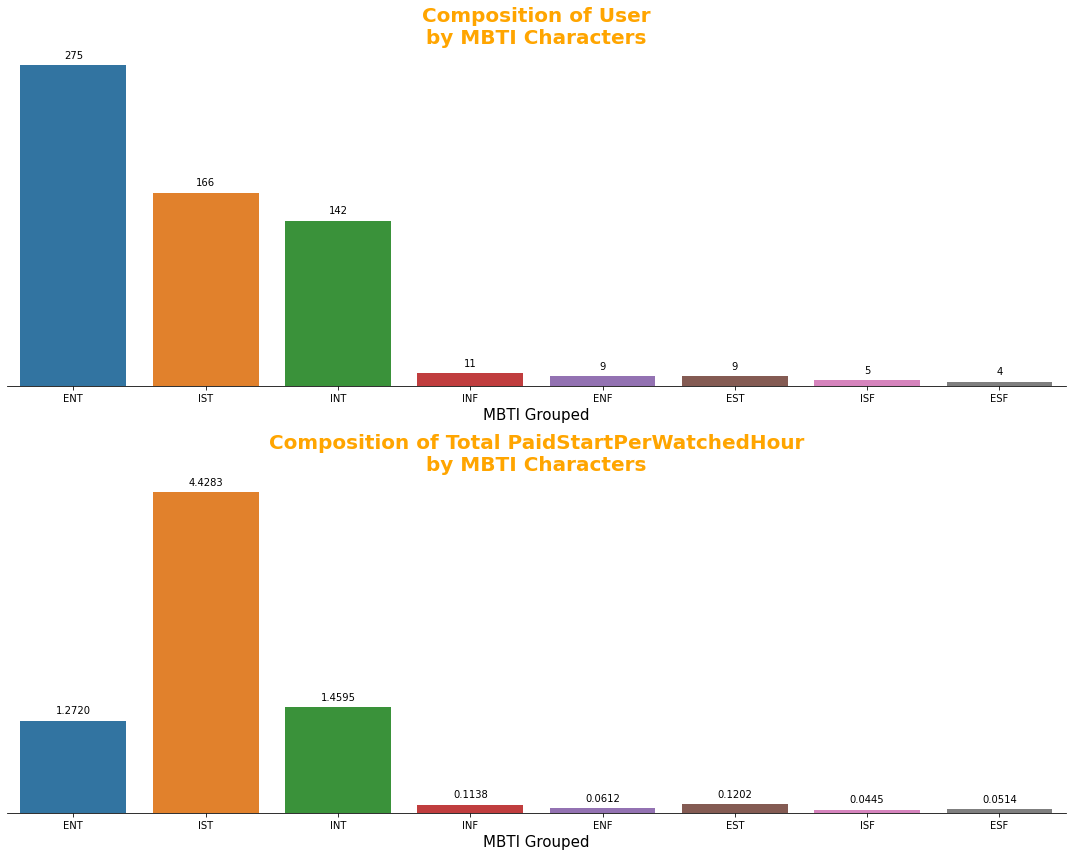

In [490]:
MBTI_list = ["MBTI_Characters","PaidStarPerWatchedHour"]

# def autopct(pct, data, column):
#   if column == "T_vs_F":
#     absolute_value = int(pct/100*np.sum(data))
#     return "{:0.2f}%\n({:d} Users)".format(pct, absolute_value)
#   else:
#     absolute_value = float(pct/100*np.sum(data))
#     return "{:0.2f}%\n({:0.5f})".format(pct, absolute_value)

palette = sns.color_palette("bright")

fig, axs = plt.subplots(2,1, figsize=(15, 12))
for i, column in enumerate(MBTI_list):
  x = df_MBTI_grouped_summary.index
  y = column
  sns.barplot(data=df_MBTI_grouped_summary, x=x, y=y, ax=axs[i])
  axs[i].set_xlabel("MBTI Grouped", fontsize=15)
  axs[i].yaxis.set_visible(False)
  axs[0].set_title("Composition of User\nby MBTI Characters",fontsize=20, fontweight="bold", color="orange")
  axs[1].set_title("Composition of Total PaidStartPerWatchedHour\nby MBTI Characters",fontsize=20, fontweight="bold", color="orange")
  for p in axs[i].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    if column == "MBTI_Characters":
          axs[i].annotate(
                          int(height),
                          xy=(x + width/2, height),
                          ha="center",
                          va="center",
                          xytext=(0, 10),
                          textcoords="offset points"
                         )
    else:
      axs[i].annotate(
                      "{:0.4f}".format(height),
                      xy=(x + width/2, height),
                      ha="center",
                      va="center",
                      xytext=(0, 10),
                      textcoords="offset points"
                     )
sns.despine(left=True, top=True, right=True) 
plt.tight_layout()
plt.show()

#### Data Analysis : Correlation of Numerical Features with Lable

In [491]:
df_Core_numerical = df_Core.copy()
display(df_Core_numerical.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped,PaidStarPerWatchedHour
0,ID,Male,MLBB,96751,104,INT,0.004113
1,ID,Male,8 Ball Pool,4781,174,INT,0.002855
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST,0.003007
3,ID,Male,MLBB,142037,127,ENT,0.005171
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF,0.001213


In [492]:
df_Core_numerical_corr = df_Core_numerical.corr()
display (df_Core_numerical_corr)

,Total Follower,Broadcast Hours,PaidStarPerWatchedHour
Total Follower,1.000000,-0.031504,-0.012481
Broadcast Hours,-0.031504,1.000000,-0.021874
PaidStarPerWatchedHour,-0.012481,-0.021874,1.000000


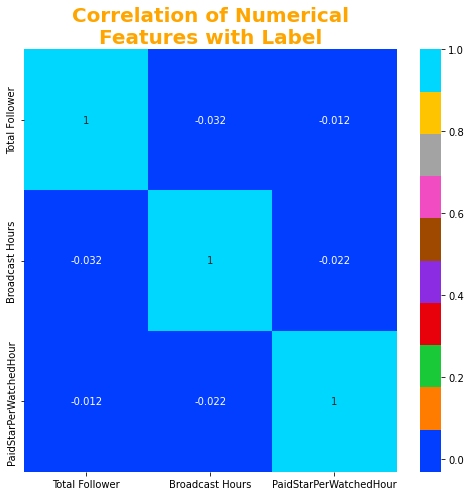

In [493]:
fig, axs = plt.subplots(figsize=(7, 7))
cmap = sns.color_palette("bright", as_cmap=True)
sns.heatmap(data=df_Core_numerical_corr, annot=True, cmap=cmap, ax=axs)
axs.set_title("Correlation of Numerical\nFeatures with Label", fontsize=20, fontweight="bold", color="orange")
plt.tight_layout()
plt.show()

In [494]:
df_Core_numerical_dataset = df_Core[["Total Follower","Broadcast Hours", "PaidStarPerWatchedHour"]].copy()
display(df_Core_numerical_dataset.head())

,Total Follower,Broadcast Hours,PaidStarPerWatchedHour
0,96751,104,0.004113
1,4781,174,0.002855
2,68246,83,0.003007
3,142037,127,0.005171
4,15416,86,0.001213


##### Data Analysis : Total Follower & PaidStarPerWathedHour

In [495]:
df_Core_numerical_total_follower = df_Core_numerical_dataset[["Total Follower","PaidStarPerWatchedHour"]].sort_values(by="Total Follower").reset_index(drop=True).copy()
display(df_Core_numerical_total_follower.head())

,Total Follower,PaidStarPerWatchedHour
0,2638,0.000000
1,3148,0.000391
2,3191,0.003888
3,3292,0.001665
4,3477,0.001151


In [496]:
def follower(x):
    if x < 10000:
        return "thousand"
    elif x >= 10000 and x < 100000:
        return "ten of thousands"
    elif x >= 100000 and x < 1000000:
        return "hundreds of thousands"
    else:
        return "millions"

In [497]:
df_Core_numerical_total_follower["follower category"] = df_Core_numerical_total_follower["Total Follower"].apply(lambda x : follower(x))
display(df_Core_numerical_total_follower.head())

,Total Follower,PaidStarPerWatchedHour,follower category
0,2638,0.000000,thousand
1,3148,0.000391,thousand
2,3191,0.003888,thousand
3,3292,0.001665,thousand
4,3477,0.001151,thousand


In [498]:
df_follower_category = df_Core_numerical_total_follower.groupby(["follower category"], sort=False).agg({
                                                                                            "follower category":"count",
                                                                                            "PaidStarPerWatchedHour":"sum"
                                                                                           }).rename(columns={"follower category":"count follower category"})

display(df_follower_category)

,count follower category,PaidStarPerWatchedHour
follower category,,
thousand,61,0.287159
ten of thousands,312,4.933826
hundreds of thousands,221,2.159868
millions,27,0.170081


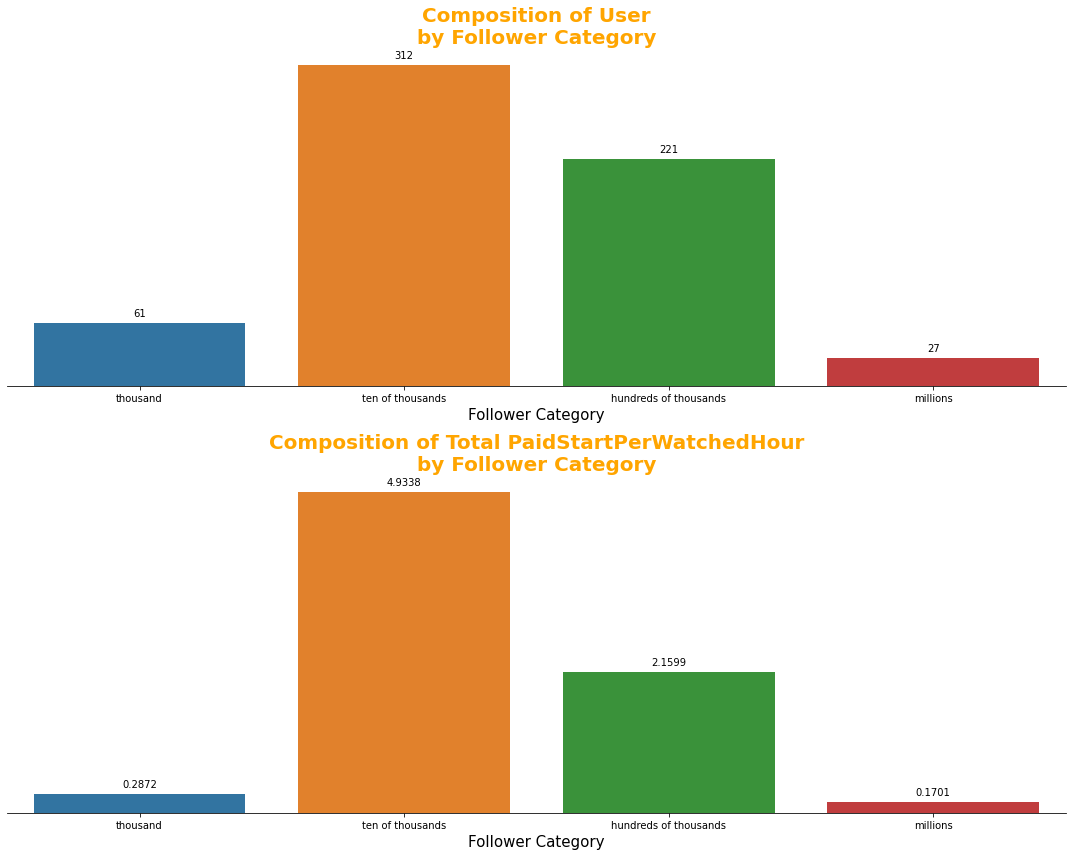

In [499]:
follower_category_list = ["count follower category","PaidStarPerWatchedHour"]

# def autopct(pct, data, column):
#   if column == "T_vs_F":
#     absolute_value = int(pct/100*np.sum(data))
#     return "{:0.2f}%\n({:d} Users)".format(pct, absolute_value)
#   else:
#     absolute_value = float(pct/100*np.sum(data))
#     return "{:0.2f}%\n({:0.5f})".format(pct, absolute_value)

palette = sns.color_palette("bright")

fig, axs = plt.subplots(2,1, figsize=(15, 12))
for i, column in enumerate(follower_category_list):
  x = df_follower_category.index
  y = column
  sns.barplot(data=df_follower_category, x=x, y=y, ax=axs[i])
  axs[i].set_xlabel("Follower Category", fontsize=15)
  axs[i].yaxis.set_visible(False)
  axs[0].set_title("Composition of User\nby Follower Category",fontsize=20, fontweight="bold", color="orange")
  axs[1].set_title("Composition of Total PaidStartPerWatchedHour\nby Follower Category",fontsize=20, fontweight="bold", color="orange")
  for p in axs[i].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    if column == "count follower category":
          axs[i].annotate(
                          int(height),
                          xy=(x + width/2, height),
                          ha="center",
                          va="center",
                          xytext=(0, 10),
                          textcoords="offset points"
                         )
    else:
      axs[i].annotate(
                      "{:0.4f}".format(height),
                      xy=(x + width/2, height),
                      ha="center",
                      va="center",
                      xytext=(0, 10),
                      textcoords="offset points"
                     )
sns.despine(left=True, top=True, right=True) 
plt.tight_layout()
plt.show()

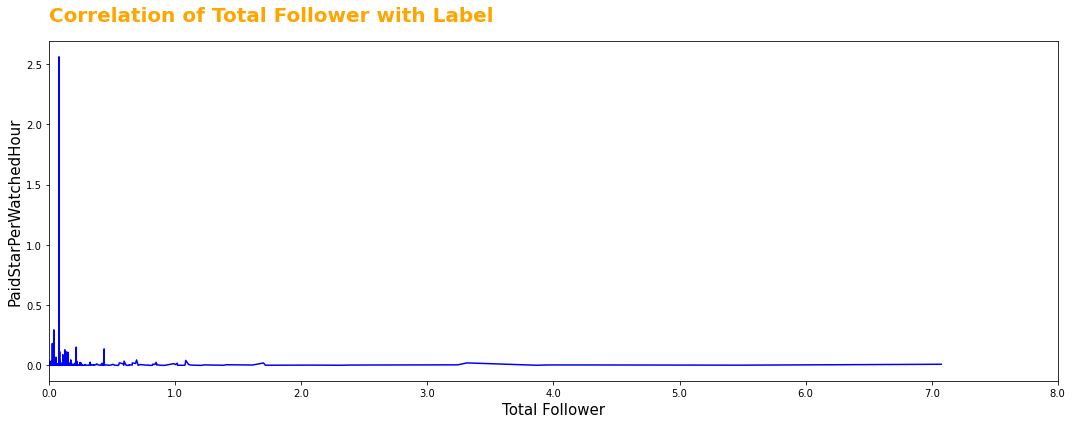

In [500]:
fig, axs = plt.subplots(figsize=(15, 6))
sns.lineplot(data=df_Core_numerical_total_follower, x="Total Follower", y="PaidStarPerWatchedHour",color="blue", ax=axs)
axs.set_title("Correlation of Total Follower with Label", fontsize=20, fontweight="bold", pad=20, loc="left", color="orange")
x_max = df_Core_numerical_total_follower["Total Follower"].max()
x_min = df_Core_numerical_total_follower["Total Follower"].min()
axs.set_xlim(x_min, x_max)
axs.set_xticks(axs.get_xticks())
axs.set_xticklabels(axs.get_xticks()/1000000)
axs.set_xlabel("Total Follower", fontsize=15)
axs.set_ylabel("PaidStarPerWatchedHour", fontsize=15)
# axs.set_xticks(np.arange(x_min, x_max, 1000))
plt.tight_layout()
plt.show()

##### Data Analysis : Broadcast Hours & PaidStarPerWathedHour

In [501]:
df_Core_numerical_broadcast_hours = df_Core_numerical_dataset[["Broadcast Hours","PaidStarPerWatchedHour"]].sort_values(by="Broadcast Hours").reset_index(drop=True).copy()
display(df_Core_numerical_broadcast_hours.tail())

,Broadcast Hours,PaidStarPerWatchedHour
616,321,0.001404
617,349,0.016642
618,349,0.000020
619,369,0.002092
620,571,0.001735


In [502]:
def broadcast(x):
    if x < 24:
        return "under 24 hours"
    elif x >= 24 and x < 100:
        return "more 24 hours"
    elif x >= 100 and x < 200:
        return "more 100 hours"
    elif x >= 200 and x < 300:
        return "more 200 hours"
    elif x >= 300 and x < 400:
        return "more 300 hours"
    elif x >= 400 and x < 500:
        return "more 400 hours"
    elif x >= 500 and x < 600:
        return "more 500 hours"
    else:
        return "more 600 hours"

In [503]:
df_Core_numerical_broadcast_hours["broadcast hours category"] = df_Core_numerical_broadcast_hours["Broadcast Hours"].apply(lambda x : broadcast(x))
display(df_Core_numerical_broadcast_hours.head())

,Broadcast Hours,PaidStarPerWatchedHour,broadcast hours category
0,0,0.000000,under 24 hours
1,1,0.002688,under 24 hours
2,1,0.006452,under 24 hours
3,4,0.000000,under 24 hours
4,15,0.001079,under 24 hours


In [504]:
df_broadcast_hours = df_Core_numerical_broadcast_hours.groupby(["broadcast hours category"]).agg({
                                                                                                  "broadcast hours category":"count",
                                                                                                  "PaidStarPerWatchedHour":"sum"
                                                                                                 }).rename(columns={"broadcast hours category":"broadcast hours category counts"})
display(df_broadcast_hours)

,broadcast hours category counts,PaidStarPerWatchedHour
broadcast hours category,,
more 100 hours,370,3.064314
more 200 hours,46,0.431156
more 24 hours,191,4.018022
more 300 hours,7,0.025488
more 500 hours,1,0.001735
under 24 hours,6,0.010219


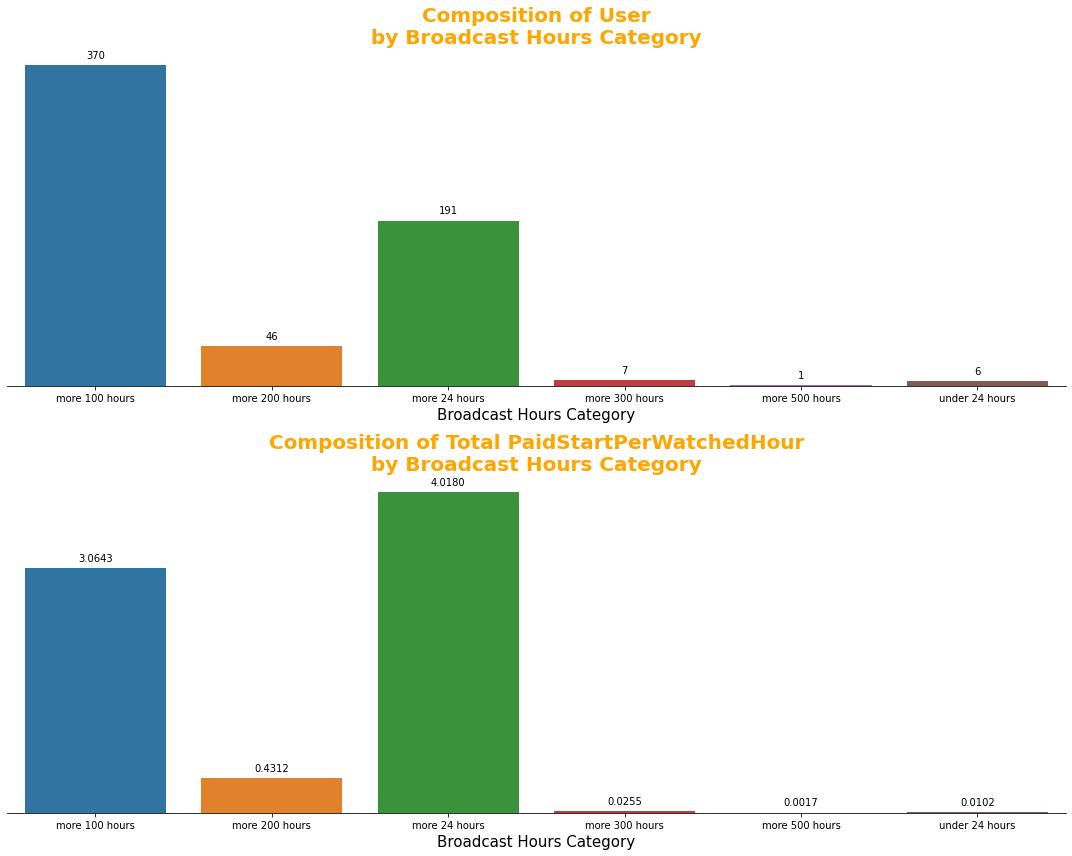

In [505]:
broadcast_hours_category_list = ["broadcast hours category counts","PaidStarPerWatchedHour"]

# def autopct(pct, data, column):
#   if column == "T_vs_F":
#     absolute_value = int(pct/100*np.sum(data))
#     return "{:0.2f}%\n({:d} Users)".format(pct, absolute_value)
#   else:
#     absolute_value = float(pct/100*np.sum(data))
#     return "{:0.2f}%\n({:0.5f})".format(pct, absolute_value)

palette = sns.color_palette("bright")

fig, axs = plt.subplots(2,1, figsize=(15, 12))
for i, column in enumerate(broadcast_hours_category_list):
  x = df_broadcast_hours.index
  y = column
  sns.barplot(data=df_broadcast_hours, x=x, y=y, ax=axs[i])
  axs[i].set_xlabel("Broadcast Hours Category", fontsize=15)
  axs[i].yaxis.set_visible(False)
  axs[0].set_title("Composition of User\nby Broadcast Hours Category",fontsize=20, fontweight="bold", color="orange")
  axs[1].set_title("Composition of Total PaidStartPerWatchedHour\nby Broadcast Hours Category",fontsize=20, fontweight="bold", color="orange")
  for p in axs[i].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    if column == "broadcast hours category counts":
          axs[i].annotate(
                          int(height),
                          xy=(x + width/2, height),
                          ha="center",
                          va="center",
                          xytext=(0, 10),
                          textcoords="offset points"
                         )
    else:
      axs[i].annotate(
                      "{:0.4f}".format(height),
                      xy=(x + width/2, height),
                      ha="center",
                      va="center",
                      xytext=(0, 10),
                      textcoords="offset points"
                     )
sns.despine(left=True, top=True, right=True) 
plt.tight_layout()
plt.show()

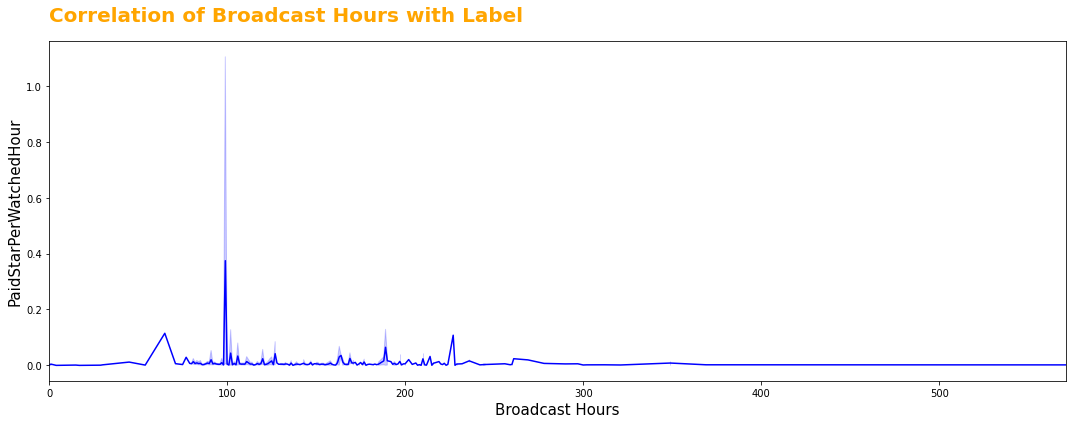

In [506]:
fig, axs = plt.subplots(figsize=(15, 6))
sns.lineplot(data=df_Core_numerical_broadcast_hours, x="Broadcast Hours", y="PaidStarPerWatchedHour",color="blue", ax=axs)
axs.set_title("Correlation of Broadcast Hours with Label", fontsize=20, fontweight="bold", pad=20, loc="left", color="orange")
x_max = df_Core_numerical_broadcast_hours["Broadcast Hours"].max()
x_min = df_Core_numerical_broadcast_hours["Broadcast Hours"].min()
axs.set_xlim(x_min, x_max)
# axs.set_xticks(axs.get_xticks())
# axs.set_xticklabels(axs.get_xticks()/1000000)
axs.set_xlabel("Broadcast Hours", fontsize=15)
axs.set_ylabel("PaidStarPerWatchedHour", fontsize=15)
# axs.set_xticks(np.arange(x_min, x_max, 1000))
plt.tight_layout()
plt.show()

### Data Analysis : df_Character_columns

In [507]:
df_Character_columns = Features[Character_columns].copy()
display(df_Character_columns.head())

,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Character_Facet_Cont_Dutifulness,Character_Cont_Conscientiousness,Character_Facet_Cont_Sympathy,Character_Facet_Cont_ArtisticInterests,Character_Facet_Cont_Friendliness,Character_Cont_Extraversion,Character_Facet_Cont_SelfConsciousness,Character_Facet_Cont_Adventurousness,...,Character_Facet_Cont_Trust,Character_Cont_Agreeableness,Character_Facet_Cont_Vulnerability,Character_Facet_Cont_ExcitementSeeking,Character_Facet_Cont_Morality,Character_Facet_Cont_Depression,Character_Facet_Cont_SelfDiscipline,Character_Facet_Cont_Cooperation,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness
0,0.663442,0.718679,0.471456,0.522711,0.337836,0.504059,0.494384,0.474577,0.471482,0.544957,...,0.450080,0.467756,0.686694,0.554406,0.553544,0.771031,0.518061,0.352032,0.494384,0.751974
1,0.543255,0.427887,0.493514,0.348513,0.408481,0.577758,0.468738,0.445183,0.352964,0.604113,...,0.504510,0.225692,0.627786,0.511837,0.352700,0.462166,0.442303,0.401419,0.468738,0.571198
2,0.527279,0.399873,0.472405,0.376854,0.518602,0.594752,0.413872,0.322573,0.750039,0.657773,...,0.458500,0.368622,0.636199,0.860169,0.657773,0.753035,0.385781,0.335437,0.515929,0.309322
3,0.677222,0.603534,0.467787,0.499234,0.571441,0.597648,0.516412,0.616428,0.562344,0.785618,...,0.476508,0.234587,0.628119,0.526966,0.155550,0.558339,0.535313,0.461569,0.516412,0.535322
4,0.238194,0.543285,0.583099,0.469371,0.596872,0.377506,0.343620,0.181473,0.449570,0.346318,...,0.553488,0.599067,0.380608,0.353411,0.346318,0.458808,0.546704,0.437006,0.586193,0.567604


#### Split df_Character_columns to df_Character_Facet && df_Character_Cont

In [508]:
df_Character_list_columns = df_Character_columns.columns.to_list()
display(df_Character_list_columns)

['Character_Facet_Cont_Rigidity',
 'Character_Facet_Cont_AchievementStriving',
 'Character_Facet_Cont_Dutifulness',
 'Character_Cont_Conscientiousness',
 'Character_Facet_Cont_Sympathy',
 'Character_Facet_Cont_ArtisticInterests',
 'Character_Facet_Cont_Friendliness',
 'Character_Cont_Extraversion',
 'Character_Facet_Cont_SelfConsciousness',
 'Character_Facet_Cont_Adventurousness',
 'Character_Facet_Cont_Activity',
 'Character_Cont_Openness',
 'Character_Facet_Cont_Anxiety',
 'Character_Facet_Cont_Emotionality',
 'Character_Facet_Cont_Tension',
 'Character_Facet_Cont_Altruism',
 'Character_Facet_Cont_Orderliness',
 'Character_Cont_Neuroticism',
 'Character_Facet_Cont_Modesty',
 'Character_Facet_Cont_Imagination',
 'Character_Facet_Cont_Trust',
 'Character_Cont_Agreeableness',
 'Character_Facet_Cont_Vulnerability',
 'Character_Facet_Cont_ExcitementSeeking',
 'Character_Facet_Cont_Morality',
 'Character_Facet_Cont_Depression',
 'Character_Facet_Cont_SelfDiscipline',
 'Character_Facet_Cont

In [509]:
df_Character_Facet_list = []
df_Character_Cont_list = []

for c in df_Character_list_columns:
    if ~(c.find("Character_Facet")):
        df_Character_Facet_list.append(c)
    else:
        df_Character_Cont_list.append(c)

display(df_Character_Cont_list)

['Character_Cont_Conscientiousness',
 'Character_Cont_Extraversion',
 'Character_Cont_Openness',
 'Character_Cont_Neuroticism',
 'Character_Cont_Agreeableness']

In [510]:
df_Character_Facet = df_Character_columns[df_Character_Facet_list].copy()
df_Character_Cont = df_Character_columns[df_Character_Cont_list].copy()
display(df_Character_Facet.head())
display(df_Character_Cont.head())

,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Character_Facet_Cont_Dutifulness,Character_Facet_Cont_Sympathy,Character_Facet_Cont_ArtisticInterests,Character_Facet_Cont_Friendliness,Character_Facet_Cont_SelfConsciousness,Character_Facet_Cont_Adventurousness,Character_Facet_Cont_Activity,Character_Facet_Cont_Anxiety,...,Character_Facet_Cont_Imagination,Character_Facet_Cont_Trust,Character_Facet_Cont_Vulnerability,Character_Facet_Cont_ExcitementSeeking,Character_Facet_Cont_Morality,Character_Facet_Cont_Depression,Character_Facet_Cont_SelfDiscipline,Character_Facet_Cont_Cooperation,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness
0,0.663442,0.718679,0.471456,0.337836,0.504059,0.494384,0.471482,0.544957,0.691145,0.771031,...,0.707490,0.450080,0.686694,0.554406,0.553544,0.771031,0.518061,0.352032,0.494384,0.751974
1,0.543255,0.427887,0.493514,0.408481,0.577758,0.468738,0.352964,0.604113,0.554197,0.462166,...,0.334937,0.504510,0.627786,0.511837,0.352700,0.462166,0.442303,0.401419,0.468738,0.571198
2,0.527279,0.399873,0.472405,0.518602,0.594752,0.413872,0.750039,0.657773,0.546109,0.536447,...,0.571106,0.458500,0.636199,0.860169,0.657773,0.753035,0.385781,0.335437,0.515929,0.309322
3,0.677222,0.603534,0.467787,0.571441,0.597648,0.516412,0.562344,0.785618,0.657482,0.558339,...,0.472366,0.476508,0.628119,0.526966,0.155550,0.558339,0.535313,0.461569,0.516412,0.535322
4,0.238194,0.543285,0.583099,0.596872,0.377506,0.343620,0.449570,0.346318,0.401776,0.354810,...,0.551450,0.553488,0.380608,0.353411,0.346318,0.458808,0.546704,0.437006,0.586193,0.567604


,Character_Cont_Conscientiousness,Character_Cont_Extraversion,Character_Cont_Openness,Character_Cont_Neuroticism,Character_Cont_Agreeableness
0,0.522711,0.474577,0.519794,0.440367,0.467756
1,0.348513,0.445183,0.665509,0.366972,0.225692
2,0.376854,0.322573,0.491615,0.755765,0.368622
3,0.499234,0.616428,0.694244,0.357798,0.234587
4,0.469371,0.181473,0.458157,0.485426,0.599067


#### Data Analysis : df_Character_Cont

##### Checking Dimensi of df_Character_Cont

In [511]:
print("Dimension of df_Character_Cont = %d Rows & %d Columns"%df_Character_Cont.shape)

Dimension of df_Character_Cont = 621 Rows & 5 Columns


##### Making df_Character_Cont_dataset

In [512]:
df_Character_Cont_dataset = df_Character_Cont.join(Label)
display(df_Character_Cont_dataset.head())

,Character_Cont_Conscientiousness,Character_Cont_Extraversion,Character_Cont_Openness,Character_Cont_Neuroticism,Character_Cont_Agreeableness,PaidStarPerWatchedHour
0,0.522711,0.474577,0.519794,0.440367,0.467756,0.004113
1,0.348513,0.445183,0.665509,0.366972,0.225692,0.002855
2,0.376854,0.322573,0.491615,0.755765,0.368622,0.003007
3,0.499234,0.616428,0.694244,0.357798,0.234587,0.005171
4,0.469371,0.181473,0.458157,0.485426,0.599067,0.001213


##### Correlation Betwen Character_Cont & PaidStarPerWatchedHour

In [513]:
df_Character_Cont_dataset_corr = df_Character_Cont_dataset.corr()
display(df_Character_Cont_dataset_corr)

,Character_Cont_Conscientiousness,Character_Cont_Extraversion,Character_Cont_Openness,Character_Cont_Neuroticism,Character_Cont_Agreeableness,PaidStarPerWatchedHour
Character_Cont_Conscientiousness,1.000000,0.566918,0.514384,-0.222642,-0.246438,-0.126875
Character_Cont_Extraversion,0.566918,1.000000,0.767072,-0.160626,-0.509032,-0.052476
Character_Cont_Openness,0.514384,0.767072,1.000000,-0.103226,-0.578429,-0.100165
Character_Cont_Neuroticism,-0.222642,-0.160626,-0.103226,1.000000,0.105283,0.023418
Character_Cont_Agreeableness,-0.246438,-0.509032,-0.578429,0.105283,1.000000,-0.011126
PaidStarPerWatchedHour,-0.126875,-0.052476,-0.100165,0.023418,-0.011126,1.000000


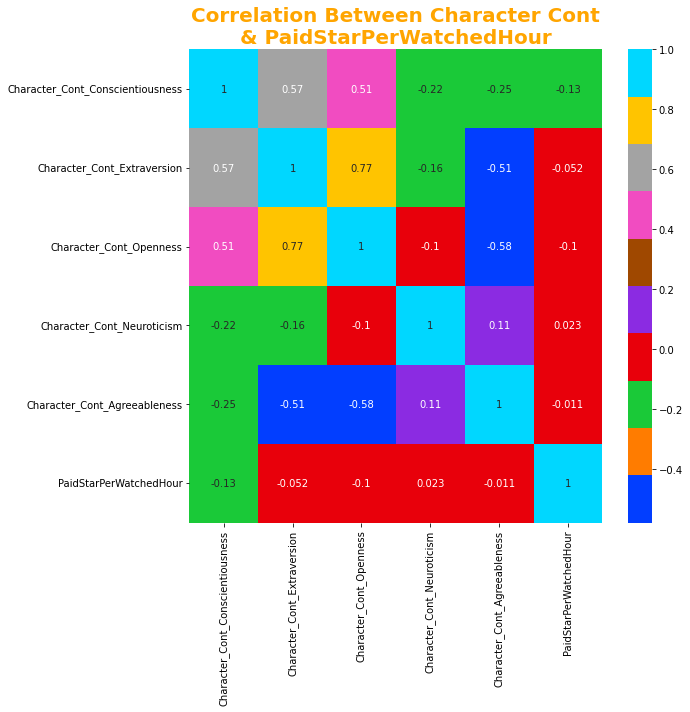

In [514]:
fig, axs = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("bright",as_cmap=True)
sns.heatmap(data=df_Character_Cont_dataset_corr, cmap=cmap, annot=True, ax=axs)
axs.set_title("Correlation Between Character Cont\n& PaidStarPerWatchedHour", fontsize=20, fontweight="bold", color="orange")
plt.tight_layout()
plt.show()

In [515]:
df_Character_Cont_analysis = df_Character_Cont_dataset[["Character_Cont_Conscientiousness","Character_Cont_Openness","PaidStarPerWatchedHour"]].copy()
display(df_Character_Cont_analysis.head())

,Character_Cont_Conscientiousness,Character_Cont_Openness,PaidStarPerWatchedHour
0,0.522711,0.519794,0.004113
1,0.348513,0.665509,0.002855
2,0.376854,0.491615,0.003007
3,0.499234,0.694244,0.005171
4,0.469371,0.458157,0.001213


In [516]:
print("Checking Basic Statistical Value = ?")
display(df_Character_Cont_analysis.describe().T[["min","max"]])

Checking Basic Statistical Value = ?


,min,max
Character_Cont_Conscientiousness,0.192784,0.732078
Character_Cont_Openness,0.239063,0.896412
PaidStarPerWatchedHour,0.000000,2.561621


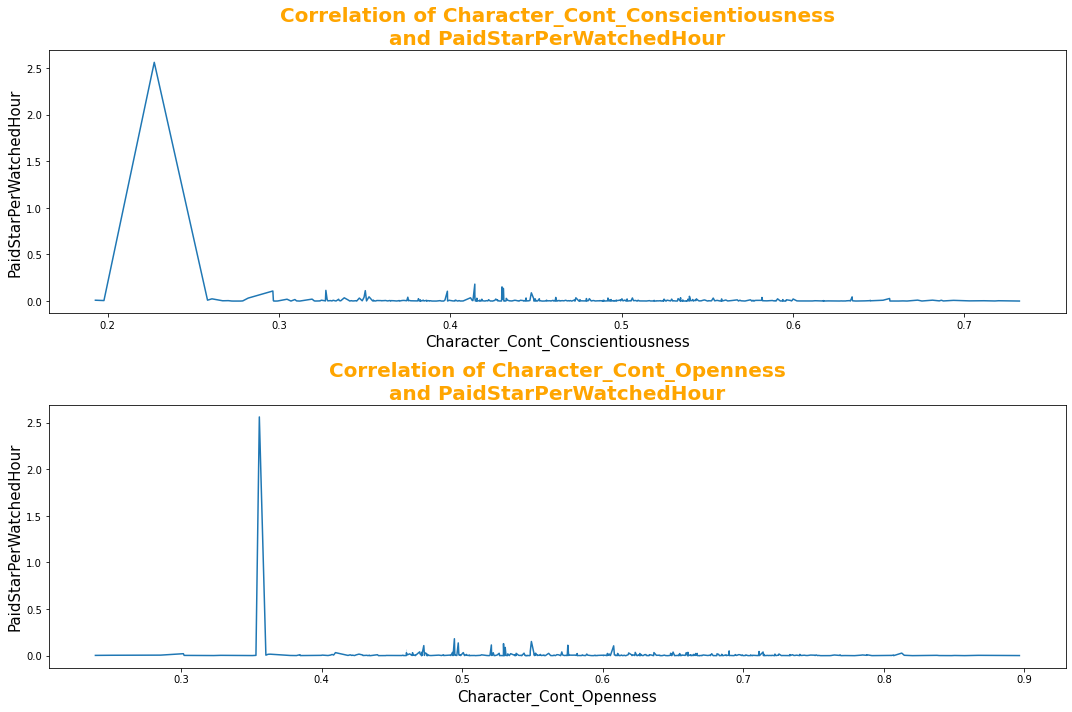

In [517]:
df_Character_Cont_analysis_columns = ["Character_Cont_Conscientiousness","Character_Cont_Openness"]

fig, axs = plt.subplots(2, 1, figsize=(15, 10))
for i, column in enumerate(df_Character_Cont_analysis_columns):
    sns.lineplot(data=df_Character_Cont_analysis, x=column, y="PaidStarPerWatchedHour", ax=axs[i])
    axs[i].set_title("Correlation of {}\nand PaidStarPerWatchedHour".format(column), fontsize=20, fontweight="bold", color="orange")
    axs[i].set_xlabel(column, fontsize=15)
    axs[i].set_ylabel("PaidStarPerWatchedHour", fontsize=15)
plt.tight_layout()
plt.show()

#### Data Analysis : df_Character_Facet

##### Checking Dimensi of df_Character_Facet

In [518]:
print("Dimension of df_Character_Facet = %d Rows & %d Columns"%df_Character_Facet.shape)

Dimension of df_Character_Facet = 621 Rows & 25 Columns


##### Making df_Character_Facet_dataset

In [519]:
df_Character_Facet_dataset = df_Character_Facet.join(Label)
display(df_Character_Facet_dataset.head())

,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Character_Facet_Cont_Dutifulness,Character_Facet_Cont_Sympathy,Character_Facet_Cont_ArtisticInterests,Character_Facet_Cont_Friendliness,Character_Facet_Cont_SelfConsciousness,Character_Facet_Cont_Adventurousness,Character_Facet_Cont_Activity,Character_Facet_Cont_Anxiety,...,Character_Facet_Cont_Trust,Character_Facet_Cont_Vulnerability,Character_Facet_Cont_ExcitementSeeking,Character_Facet_Cont_Morality,Character_Facet_Cont_Depression,Character_Facet_Cont_SelfDiscipline,Character_Facet_Cont_Cooperation,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,PaidStarPerWatchedHour
0,0.663442,0.718679,0.471456,0.337836,0.504059,0.494384,0.471482,0.544957,0.691145,0.771031,...,0.450080,0.686694,0.554406,0.553544,0.771031,0.518061,0.352032,0.494384,0.751974,0.004113
1,0.543255,0.427887,0.493514,0.408481,0.577758,0.468738,0.352964,0.604113,0.554197,0.462166,...,0.504510,0.627786,0.511837,0.352700,0.462166,0.442303,0.401419,0.468738,0.571198,0.002855
2,0.527279,0.399873,0.472405,0.518602,0.594752,0.413872,0.750039,0.657773,0.546109,0.536447,...,0.458500,0.636199,0.860169,0.657773,0.753035,0.385781,0.335437,0.515929,0.309322,0.003007
3,0.677222,0.603534,0.467787,0.571441,0.597648,0.516412,0.562344,0.785618,0.657482,0.558339,...,0.476508,0.628119,0.526966,0.155550,0.558339,0.535313,0.461569,0.516412,0.535322,0.005171
4,0.238194,0.543285,0.583099,0.596872,0.377506,0.343620,0.449570,0.346318,0.401776,0.354810,...,0.553488,0.380608,0.353411,0.346318,0.458808,0.546704,0.437006,0.586193,0.567604,0.001213


##### Correlation Betwen Character_Facet & PaidStarPerWatchedHour

In [520]:
df_Character_Facet_dataset_corr = df_Character_Facet_dataset.corr()
display(df_Character_Facet_dataset_corr)

,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Character_Facet_Cont_Dutifulness,Character_Facet_Cont_Sympathy,Character_Facet_Cont_ArtisticInterests,Character_Facet_Cont_Friendliness,Character_Facet_Cont_SelfConsciousness,Character_Facet_Cont_Adventurousness,Character_Facet_Cont_Activity,Character_Facet_Cont_Anxiety,...,Character_Facet_Cont_Trust,Character_Facet_Cont_Vulnerability,Character_Facet_Cont_ExcitementSeeking,Character_Facet_Cont_Morality,Character_Facet_Cont_Depression,Character_Facet_Cont_SelfDiscipline,Character_Facet_Cont_Cooperation,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,PaidStarPerWatchedHour
Character_Facet_Cont_Rigidity,1.000000,0.592393,-0.208317,0.575366,0.611250,0.429650,0.295179,0.602000,0.767678,0.595279,...,0.097244,0.678162,0.357224,-0.508648,0.424886,0.541759,-0.018115,0.464012,0.355422,-0.029017
Character_Facet_Cont_AchievementStriving,0.592393,1.000000,-0.220311,0.369763,0.474840,0.057318,-0.203102,0.397296,0.534772,0.619701,...,0.104330,0.417408,-0.031286,-0.747087,0.080602,0.559385,0.325957,0.332199,0.583390,-0.134285
Character_Facet_Cont_Dutifulness,-0.208317,-0.220311,1.000000,-0.179592,-0.286161,-0.163558,-0.037397,-0.101806,-0.061384,-0.331687,...,0.467624,-0.201456,0.136514,0.358581,-0.137611,-0.140916,0.000561,-0.361432,-0.271460,-0.035922
Character_Facet_Cont_Sympathy,0.575366,0.369763,-0.179592,1.000000,0.579357,0.369660,0.454279,0.379373,0.355149,0.282543,...,0.023929,0.207660,0.191680,-0.373035,0.175476,0.464487,0.041397,0.374534,0.265272,-0.054444
Character_Facet_Cont_ArtisticInterests,0.611250,0.474840,-0.286161,0.579357,1.000000,0.389746,0.276075,0.366987,0.421004,0.490687,...,0.091269,0.356481,0.053239,-0.549112,0.149160,0.506251,0.070688,0.540128,0.439295,-0.038878
Character_Facet_Cont_Friendliness,0.429650,0.057318,-0.163558,0.369660,0.389746,1.000000,0.528117,0.512809,0.241887,0.200918,...,0.042532,0.311897,0.356549,0.015502,0.465726,0.243228,-0.223569,0.639970,0.147426,0.056068
Character_Facet_Cont_SelfConsciousness,0.295179,-0.203102,-0.037397,0.454279,0.276075,0.528117,1.000000,0.315008,0.267843,0.019678,...,0.047680,0.198998,0.639859,0.269765,0.557906,0.088240,-0.445245,0.248124,-0.274060,0.059986
Character_Facet_Cont_Adventurousness,0.602000,0.397296,-0.101806,0.379373,0.366987,0.512809,0.315008,1.000000,0.617705,0.277187,...,0.186331,0.500058,0.478458,-0.233253,0.345488,0.352812,-0.118620,0.309562,0.199712,0.028008
Character_Facet_Cont_Activity,0.767678,0.534772,-0.061384,0.355149,0.421004,0.241887,0.267843,0.617705,1.000000,0.479872,...,0.072857,0.614651,0.495462,-0.418486,0.390431,0.462089,-0.067475,0.339965,0.241057,-0.056906
Character_Facet_Cont_Anxiety,0.595279,0.619701,-0.331687,0.282543,0.490687,0.200918,0.019678,0.277187,0.479872,1.000000,...,-0.054875,0.550728,0.033073,-0.577793,0.528876,0.412969,-0.002428,0.380110,0.545772,-0.063056


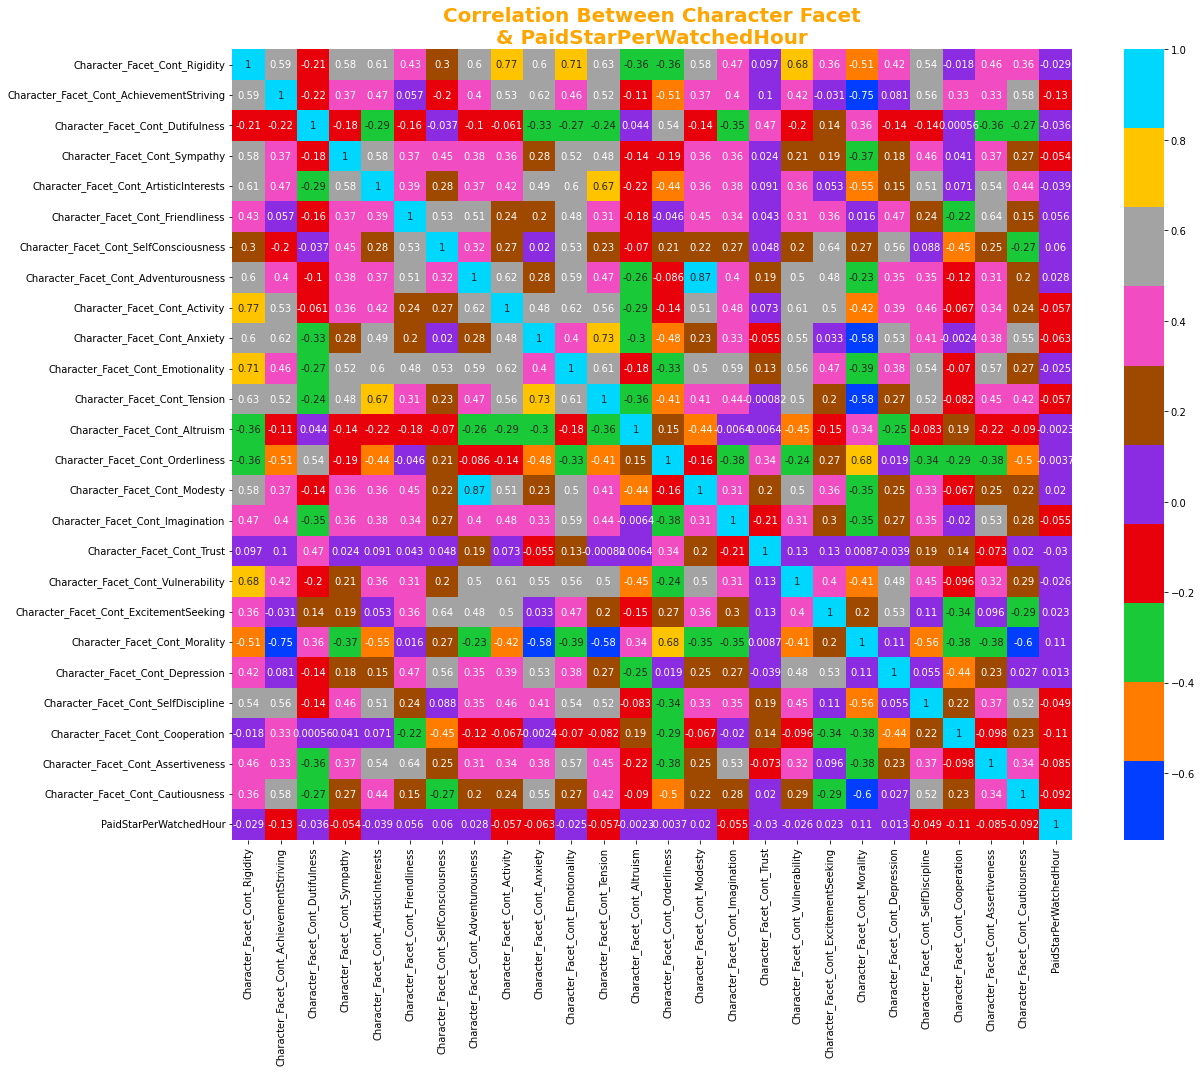

In [521]:
fig, axs = plt.subplots(figsize=(18, 15))
cmap = sns.color_palette("bright",as_cmap=True)
sns.heatmap(data=df_Character_Facet_dataset_corr, cmap=cmap, annot=True, ax=axs)
axs.set_title("Correlation Between Character Facet\n& PaidStarPerWatchedHour", fontsize=20, fontweight="bold", color="orange")
plt.tight_layout()
plt.show()

In [522]:
df_Character_Facet_analysis = df_Character_Facet_dataset[["Character_Facet_Cont_AchievementStriving","Character_Facet_Cont_Morality","Character_Facet_Cont_Cooperation","PaidStarPerWatchedHour"]].copy()
display(df_Character_Facet_analysis.head())

,Character_Facet_Cont_AchievementStriving,Character_Facet_Cont_Morality,Character_Facet_Cont_Cooperation,PaidStarPerWatchedHour
0,0.718679,0.553544,0.352032,0.004113
1,0.427887,0.352700,0.401419,0.002855
2,0.399873,0.657773,0.335437,0.003007
3,0.603534,0.155550,0.461569,0.005171
4,0.543285,0.346318,0.437006,0.001213


In [523]:
print("Checking Basic Statistical Value = ?")
display(df_Character_Facet_analysis.describe().T[["min","max"]])

Checking Basic Statistical Value = ?


,min,max
Character_Facet_Cont_AchievementStriving,0.092290,0.800362
Character_Facet_Cont_Morality,0.000000,0.818043
Character_Facet_Cont_Cooperation,0.052258,0.724056
PaidStarPerWatchedHour,0.000000,2.561621


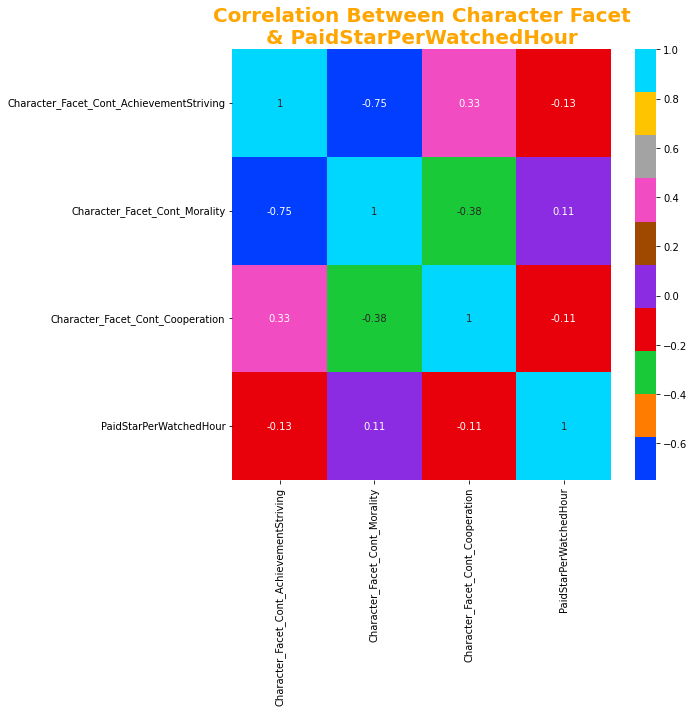

In [524]:
df_Character_Facet_analysis_corr = df_Character_Facet_analysis.corr()
fig, axs = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("bright",as_cmap=True)
sns.heatmap(data=df_Character_Facet_analysis_corr, cmap=cmap, annot=True, ax=axs)
axs.set_title("Correlation Between Character Facet\n& PaidStarPerWatchedHour", fontsize=20, fontweight="bold", color="orange")
plt.tight_layout()
plt.show()

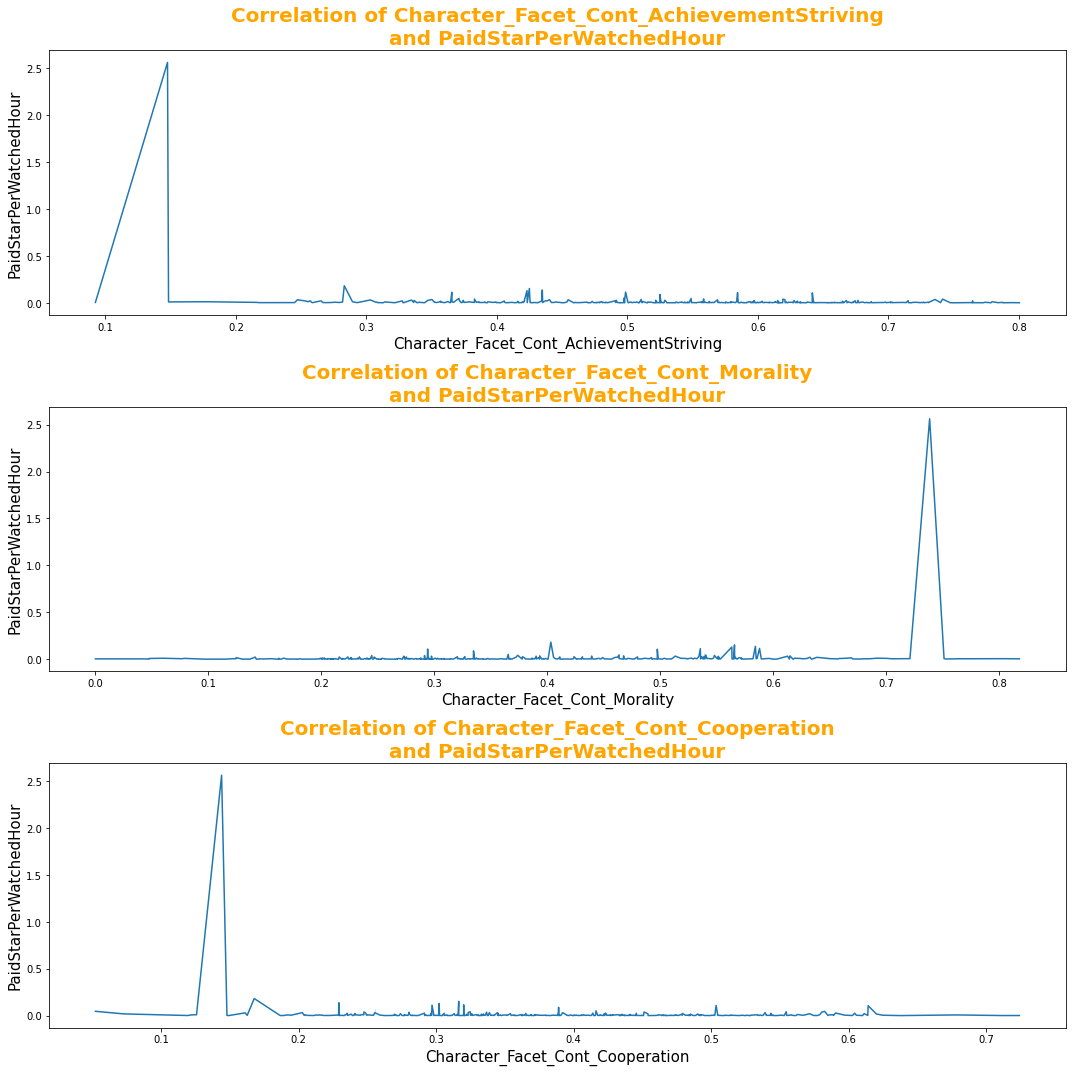

In [525]:
df_Character_Facet_analysis_columns = ["Character_Facet_Cont_AchievementStriving","Character_Facet_Cont_Morality","Character_Facet_Cont_Cooperation"]

fig, axs = plt.subplots(3, 1, figsize=(15, 15))
for i, column in enumerate(df_Character_Facet_analysis_columns):
    sns.lineplot(data=df_Character_Facet_analysis, x=column, y="PaidStarPerWatchedHour", ax=axs[i])
    axs[i].set_title("Correlation of {}\nand PaidStarPerWatchedHour".format(column), fontsize=20, fontweight="bold", color="orange")
    axs[i].set_xlabel(column, fontsize=15)
    axs[i].set_ylabel("PaidStarPerWatchedHour", fontsize=15)
plt.tight_layout()
plt.show()

### Data Analysis : df_Personal_columns

In [526]:
df_Personal_columns = Features[Personal_columns].copy()
display(df_Personal_columns.head())

,Personal_Values_Facet_Cont_Hedonism,Personal_Values_Facet_Cont_UniversalismTolerance,Personal_Values_Facet_Cont_PowerDominance,Personal_Values_Cont_SelfEnhancement,Personal_Values_Facet_Cont_PowerResources,Personal_Values_Facet_Cont_SelfDirectionThought,Personal_Values_Facet_Cont_Reputation,Personal_Values_Facet_Cont_SecuritySocietal,Personal_Values_Facet_Cont_Humility,Personal_Values_Facet_Cont_Stimulation,...,Personal_Values_Facet_Cont_SecurityPersonal,Personal_Values_Facet_Cont_UniversalismConcern,Personal_Values_Cont_SelfTranscendence,Personal_Values_Facet_Cont_Achievement,Personal_Values_Facet_Cont_BenevolenceCaring,Personal_Values_Facet_Cont_BenevolenceDependability,Personal_Values_Cont_OpennessToChange,Personal_Values_Facet_Cont_UniversalismNature,Personal_Values_Facet_Cont_Tradition,Personal_Values_Cont_Conservation
0,0.288008,0.554134,0.356304,0.303076,0.317289,0.300860,0.303197,0.450049,0.335468,0.611376,...,0.353928,0.477637,0.275763,0.322608,0.543155,0.244511,0.303909,0.523116,0.318747,0.299052
1,0.430609,0.610872,0.341675,0.298714,0.317427,0.326278,0.338721,0.473392,0.335036,0.534275,...,0.425649,0.456436,0.264248,0.333644,0.460678,0.276966,0.309062,0.444493,0.382594,0.304527
2,0.753009,0.579433,0.362791,0.231113,0.216132,0.271818,0.685388,0.407193,0.332795,0.491731,...,0.355100,0.698604,0.244235,0.287052,0.464157,0.391603,0.295549,0.581657,0.325263,0.305975
3,0.407923,0.669025,0.350921,0.297083,0.314788,0.374888,0.210783,0.383971,0.327658,0.463986,...,0.207889,0.448912,0.264291,0.318080,0.430808,0.336400,0.299255,0.385822,0.440821,0.298592
4,0.392993,0.609844,0.325093,0.276813,0.239327,0.253147,0.366347,0.584311,0.336522,0.522099,...,0.662919,0.653052,0.286270,0.309832,0.524065,0.391208,0.294530,0.582025,0.405968,0.298716


#### Split df_Personal_columns to df_Personal_Facet && df_Personal_Cont

In [527]:
df_Personal_list_columns = df_Personal_columns.columns.to_list()
display(df_Personal_list_columns)

['Personal_Values_Facet_Cont_Hedonism',
 'Personal_Values_Facet_Cont_UniversalismTolerance',
 'Personal_Values_Facet_Cont_PowerDominance',
 'Personal_Values_Cont_SelfEnhancement',
 'Personal_Values_Facet_Cont_PowerResources',
 'Personal_Values_Facet_Cont_SelfDirectionThought',
 'Personal_Values_Facet_Cont_Reputation',
 'Personal_Values_Facet_Cont_SecuritySocietal',
 'Personal_Values_Facet_Cont_Humility',
 'Personal_Values_Facet_Cont_Stimulation',
 'Personal_Values_Facet_Cont_ConformityRules',
 'Personal_Values_Facet_Cont_ConformityInterpersonal',
 'Personal_Values_Facet_Cont_SelfDirectionAction',
 'Personal_Values_Facet_Cont_SecurityPersonal',
 'Personal_Values_Facet_Cont_UniversalismConcern',
 'Personal_Values_Cont_SelfTranscendence',
 'Personal_Values_Facet_Cont_Achievement',
 'Personal_Values_Facet_Cont_BenevolenceCaring',
 'Personal_Values_Facet_Cont_BenevolenceDependability',
 'Personal_Values_Cont_OpennessToChange',
 'Personal_Values_Facet_Cont_UniversalismNature',
 'Personal_Val

In [528]:
df_Personal_Facet_list = []
df_Personal_Cont_list = []

for c in df_Personal_list_columns:
    if ~(c.find("Personal_Values_Facet")):
        df_Personal_Facet_list.append(c)
    else:
        df_Personal_Cont_list.append(c)

display(df_Personal_Cont_list)

['Personal_Values_Cont_SelfEnhancement',
 'Personal_Values_Cont_SelfTranscendence',
 'Personal_Values_Cont_OpennessToChange',
 'Personal_Values_Cont_Conservation']

In [529]:
df_Personal_Facet = df_Personal_columns[df_Personal_Facet_list].copy()
df_Personal_Cont = df_Personal_columns[df_Personal_Cont_list].copy()
display(df_Personal_Facet.head())
display(df_Personal_Cont.head())

,Personal_Values_Facet_Cont_Hedonism,Personal_Values_Facet_Cont_UniversalismTolerance,Personal_Values_Facet_Cont_PowerDominance,Personal_Values_Facet_Cont_PowerResources,Personal_Values_Facet_Cont_SelfDirectionThought,Personal_Values_Facet_Cont_Reputation,Personal_Values_Facet_Cont_SecuritySocietal,Personal_Values_Facet_Cont_Humility,Personal_Values_Facet_Cont_Stimulation,Personal_Values_Facet_Cont_ConformityRules,Personal_Values_Facet_Cont_ConformityInterpersonal,Personal_Values_Facet_Cont_SelfDirectionAction,Personal_Values_Facet_Cont_SecurityPersonal,Personal_Values_Facet_Cont_UniversalismConcern,Personal_Values_Facet_Cont_Achievement,Personal_Values_Facet_Cont_BenevolenceCaring,Personal_Values_Facet_Cont_BenevolenceDependability,Personal_Values_Facet_Cont_UniversalismNature,Personal_Values_Facet_Cont_Tradition
0,0.288008,0.554134,0.356304,0.317289,0.300860,0.303197,0.450049,0.335468,0.611376,0.547592,0.545425,0.488144,0.353928,0.477637,0.322608,0.543155,0.244511,0.523116,0.318747
1,0.430609,0.610872,0.341675,0.317427,0.326278,0.338721,0.473392,0.335036,0.534275,0.476115,0.627668,0.483454,0.425649,0.456436,0.333644,0.460678,0.276966,0.444493,0.382594
2,0.753009,0.579433,0.362791,0.216132,0.271818,0.685388,0.407193,0.332795,0.491731,0.419879,0.620256,0.552369,0.355100,0.698604,0.287052,0.464157,0.391603,0.581657,0.325263
3,0.407923,0.669025,0.350921,0.314788,0.374888,0.210783,0.383971,0.327658,0.463986,0.570237,0.516948,0.449760,0.207889,0.448912,0.318080,0.430808,0.336400,0.385822,0.440821
4,0.392993,0.609844,0.325093,0.239327,0.253147,0.366347,0.584311,0.336522,0.522099,0.549794,0.353078,0.554442,0.662919,0.653052,0.309832,0.524065,0.391208,0.582025,0.405968


,Personal_Values_Cont_SelfEnhancement,Personal_Values_Cont_SelfTranscendence,Personal_Values_Cont_OpennessToChange,Personal_Values_Cont_Conservation
0,0.303076,0.275763,0.303909,0.299052
1,0.298714,0.264248,0.309062,0.304527
2,0.231113,0.244235,0.295549,0.305975
3,0.297083,0.264291,0.299255,0.298592
4,0.276813,0.286270,0.294530,0.298716


#### Data Analysis : df_Personal_Cont

##### Checking Dimensi of df_Personal_Cont

In [530]:
print("Dimension of df_Personal_Cont = %d Rows & %d Columns"%df_Personal_Cont.shape)

Dimension of df_Personal_Cont = 621 Rows & 4 Columns


##### Making df_Personal_Cont_dataset

In [531]:
df_Personal_Cont_dataset = df_Personal_Cont.join(Label)
display(df_Personal_Cont_dataset.head())

,Personal_Values_Cont_SelfEnhancement,Personal_Values_Cont_SelfTranscendence,Personal_Values_Cont_OpennessToChange,Personal_Values_Cont_Conservation,PaidStarPerWatchedHour
0,0.303076,0.275763,0.303909,0.299052,0.004113
1,0.298714,0.264248,0.309062,0.304527,0.002855
2,0.231113,0.244235,0.295549,0.305975,0.003007
3,0.297083,0.264291,0.299255,0.298592,0.005171
4,0.276813,0.286270,0.294530,0.298716,0.001213


##### Correlation Betwen Personal_Cont & PaidStarPerWatchedHour

In [532]:
df_Personal_Cont_dataset_corr = df_Personal_Cont_dataset.corr()
display(df_Personal_Cont_dataset_corr)

,Personal_Values_Cont_SelfEnhancement,Personal_Values_Cont_SelfTranscendence,Personal_Values_Cont_OpennessToChange,Personal_Values_Cont_Conservation,PaidStarPerWatchedHour
Personal_Values_Cont_SelfEnhancement,1.000000,-0.370856,0.647940,0.642175,-0.085978
Personal_Values_Cont_SelfTranscendence,-0.370856,1.000000,-0.219589,-0.258203,0.084342
Personal_Values_Cont_OpennessToChange,0.647940,-0.219589,1.000000,0.478157,-0.029330
Personal_Values_Cont_Conservation,0.642175,-0.258203,0.478157,1.000000,-0.063123
PaidStarPerWatchedHour,-0.085978,0.084342,-0.029330,-0.063123,1.000000


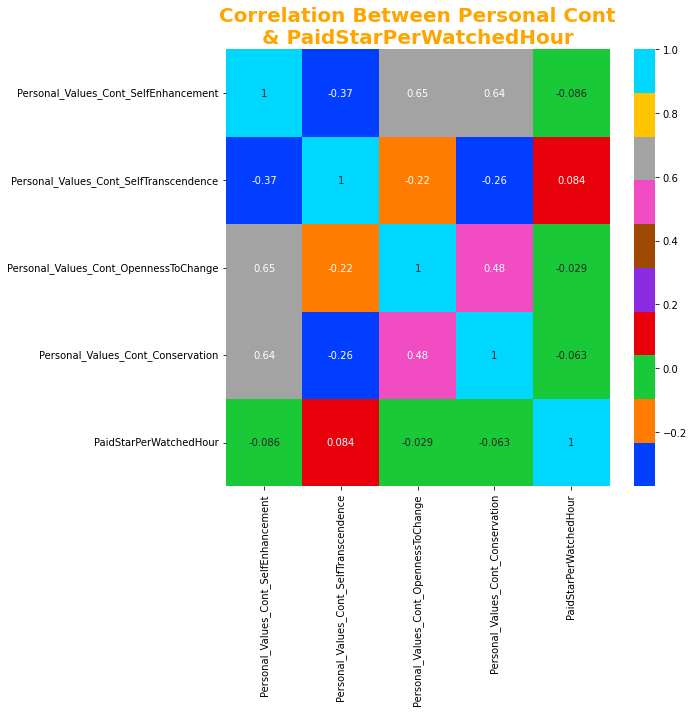

In [533]:
fig, axs = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("bright",as_cmap=True)
sns.heatmap(data=df_Personal_Cont_dataset_corr, cmap=cmap, annot=True, ax=axs)
axs.set_title("Correlation Between Personal Cont\n& PaidStarPerWatchedHour", fontsize=20, fontweight="bold", color="orange")
plt.tight_layout()
plt.show()

#### Data Analysis : df_Personal_Facet

##### Checking Dimensi of df_Personal_Facet

In [534]:
print("Dimension of df_Personal_Facet = %d Rows & %d Columns"%df_Personal_Facet.shape)

Dimension of df_Personal_Facet = 621 Rows & 19 Columns


##### Making df_Personal_Facet_dataset

In [535]:
df_Personal_Facet_dataset = df_Personal_Facet.join(Label)
display(df_Personal_Facet_dataset.head())

,Personal_Values_Facet_Cont_Hedonism,Personal_Values_Facet_Cont_UniversalismTolerance,Personal_Values_Facet_Cont_PowerDominance,Personal_Values_Facet_Cont_PowerResources,Personal_Values_Facet_Cont_SelfDirectionThought,Personal_Values_Facet_Cont_Reputation,Personal_Values_Facet_Cont_SecuritySocietal,Personal_Values_Facet_Cont_Humility,Personal_Values_Facet_Cont_Stimulation,Personal_Values_Facet_Cont_ConformityRules,Personal_Values_Facet_Cont_ConformityInterpersonal,Personal_Values_Facet_Cont_SelfDirectionAction,Personal_Values_Facet_Cont_SecurityPersonal,Personal_Values_Facet_Cont_UniversalismConcern,Personal_Values_Facet_Cont_Achievement,Personal_Values_Facet_Cont_BenevolenceCaring,Personal_Values_Facet_Cont_BenevolenceDependability,Personal_Values_Facet_Cont_UniversalismNature,Personal_Values_Facet_Cont_Tradition,PaidStarPerWatchedHour
0,0.288008,0.554134,0.356304,0.317289,0.300860,0.303197,0.450049,0.335468,0.611376,0.547592,0.545425,0.488144,0.353928,0.477637,0.322608,0.543155,0.244511,0.523116,0.318747,0.004113
1,0.430609,0.610872,0.341675,0.317427,0.326278,0.338721,0.473392,0.335036,0.534275,0.476115,0.627668,0.483454,0.425649,0.456436,0.333644,0.460678,0.276966,0.444493,0.382594,0.002855
2,0.753009,0.579433,0.362791,0.216132,0.271818,0.685388,0.407193,0.332795,0.491731,0.419879,0.620256,0.552369,0.355100,0.698604,0.287052,0.464157,0.391603,0.581657,0.325263,0.003007
3,0.407923,0.669025,0.350921,0.314788,0.374888,0.210783,0.383971,0.327658,0.463986,0.570237,0.516948,0.449760,0.207889,0.448912,0.318080,0.430808,0.336400,0.385822,0.440821,0.005171
4,0.392993,0.609844,0.325093,0.239327,0.253147,0.366347,0.584311,0.336522,0.522099,0.549794,0.353078,0.554442,0.662919,0.653052,0.309832,0.524065,0.391208,0.582025,0.405968,0.001213


##### Correlation Betwen Personal_Facet & PaidStarPerWatchedHour

In [536]:
df_Personal_Facet_dataset_corr = df_Personal_Facet_dataset.corr()
display(df_Personal_Facet_dataset_corr)

,Personal_Values_Facet_Cont_Hedonism,Personal_Values_Facet_Cont_UniversalismTolerance,Personal_Values_Facet_Cont_PowerDominance,Personal_Values_Facet_Cont_PowerResources,Personal_Values_Facet_Cont_SelfDirectionThought,Personal_Values_Facet_Cont_Reputation,Personal_Values_Facet_Cont_SecuritySocietal,Personal_Values_Facet_Cont_Humility,Personal_Values_Facet_Cont_Stimulation,Personal_Values_Facet_Cont_ConformityRules,Personal_Values_Facet_Cont_ConformityInterpersonal,Personal_Values_Facet_Cont_SelfDirectionAction,Personal_Values_Facet_Cont_SecurityPersonal,Personal_Values_Facet_Cont_UniversalismConcern,Personal_Values_Facet_Cont_Achievement,Personal_Values_Facet_Cont_BenevolenceCaring,Personal_Values_Facet_Cont_BenevolenceDependability,Personal_Values_Facet_Cont_UniversalismNature,Personal_Values_Facet_Cont_Tradition,PaidStarPerWatchedHour
Personal_Values_Facet_Cont_Hedonism,1.000000,0.201773,0.449021,-0.530789,-0.252766,0.478716,-0.080956,0.366852,-0.011826,-0.540386,0.009103,0.293300,0.457953,0.595780,-0.487638,0.240937,0.184018,0.243455,-0.270178,0.142258
Personal_Values_Facet_Cont_UniversalismTolerance,0.201773,1.000000,0.119767,-0.237468,0.105136,0.138181,0.031002,0.188152,-0.071716,-0.170602,-0.242581,0.189426,0.113994,0.198070,-0.203255,0.049048,0.133651,0.089714,0.050073,0.040486
Personal_Values_Facet_Cont_PowerDominance,0.449021,0.119767,1.000000,-0.728675,-0.226602,0.178274,0.148483,0.491867,-0.261727,-0.472258,-0.293669,0.427158,0.511303,0.611118,-0.607583,0.293730,0.358808,0.561523,-0.132188,0.104355
Personal_Values_Facet_Cont_PowerResources,-0.530789,-0.237468,-0.728675,1.000000,0.273160,-0.294095,-0.185997,-0.602232,0.275170,0.671025,0.518137,-0.582919,-0.673122,-0.824713,0.851533,-0.377790,-0.546551,-0.755731,0.192440,-0.086135
Personal_Values_Facet_Cont_SelfDirectionThought,-0.252766,0.105136,-0.226602,0.273160,1.000000,0.063644,-0.147293,-0.205704,0.131221,0.151545,-0.106918,-0.091407,-0.343400,-0.147042,0.261002,-0.195726,-0.106517,-0.294594,0.143738,-0.020654
Personal_Values_Facet_Cont_Reputation,0.478716,0.138181,0.178274,-0.294095,0.063644,1.000000,-0.349890,0.218353,0.106572,-0.366312,-0.068055,0.255106,0.161422,0.480289,-0.267660,0.002917,0.110245,0.030926,-0.217668,0.082267
Personal_Values_Facet_Cont_SecuritySocietal,-0.080956,0.031002,0.148483,-0.185997,-0.147293,-0.349890,1.000000,0.126332,-0.176751,0.008473,-0.160736,0.108281,0.117788,0.033666,-0.154451,0.157234,0.105694,0.299620,0.123079,-0.028128
Personal_Values_Facet_Cont_Humility,0.366852,0.188152,0.491867,-0.602232,-0.205704,0.218353,0.126332,1.000000,-0.176228,-0.430624,-0.308605,0.422395,0.394611,0.481596,-0.472724,0.266849,0.382738,0.465795,-0.138331,0.086062
Personal_Values_Facet_Cont_Stimulation,-0.011826,-0.071716,-0.261727,0.275170,0.131221,0.106572,-0.176751,-0.176228,1.000000,0.092438,0.169891,-0.180556,-0.258792,-0.146102,0.189485,-0.138403,-0.257297,-0.295043,-0.021010,0.015082
Personal_Values_Facet_Cont_ConformityRules,-0.540386,-0.170602,-0.472258,0.671025,0.151545,-0.366312,0.008473,-0.430624,0.092438,1.000000,0.286181,-0.442411,-0.414279,-0.603625,0.626815,-0.239554,-0.367888,-0.391848,0.184698,-0.140068


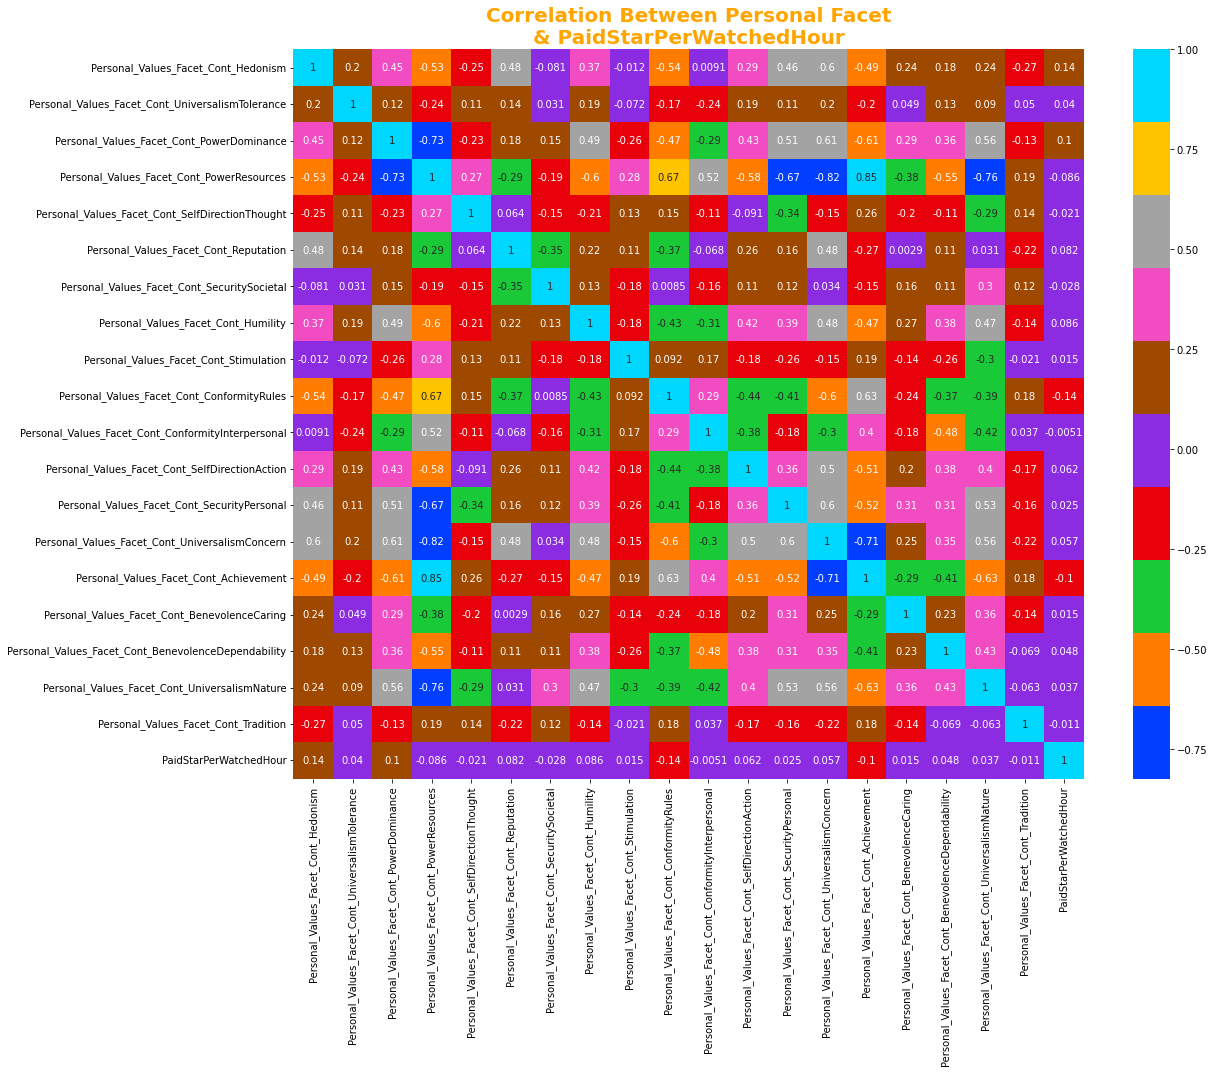

In [537]:
fig, axs = plt.subplots(figsize=(18, 15))
cmap = sns.color_palette("bright",as_cmap=True)
sns.heatmap(data=df_Personal_Facet_dataset_corr, cmap=cmap, annot=True, ax=axs)
axs.set_title("Correlation Between Personal Facet\n& PaidStarPerWatchedHour", fontsize=20, fontweight="bold", color="orange")
plt.tight_layout()
plt.show()

In [538]:
df_Personal_Facet_analysis = df_Personal_Facet_dataset[["Personal_Values_Facet_Cont_Hedonism","Personal_Values_Facet_Cont_PowerDominance","Personal_Values_Facet_Cont_ConformityRules","Personal_Values_Facet_Cont_Achievement","PaidStarPerWatchedHour"]].copy()
display(df_Personal_Facet_analysis.head())

,Personal_Values_Facet_Cont_Hedonism,Personal_Values_Facet_Cont_PowerDominance,Personal_Values_Facet_Cont_ConformityRules,Personal_Values_Facet_Cont_Achievement,PaidStarPerWatchedHour
0,0.288008,0.356304,0.547592,0.322608,0.004113
1,0.430609,0.341675,0.476115,0.333644,0.002855
2,0.753009,0.362791,0.419879,0.287052,0.003007
3,0.407923,0.350921,0.570237,0.318080,0.005171
4,0.392993,0.325093,0.549794,0.309832,0.001213


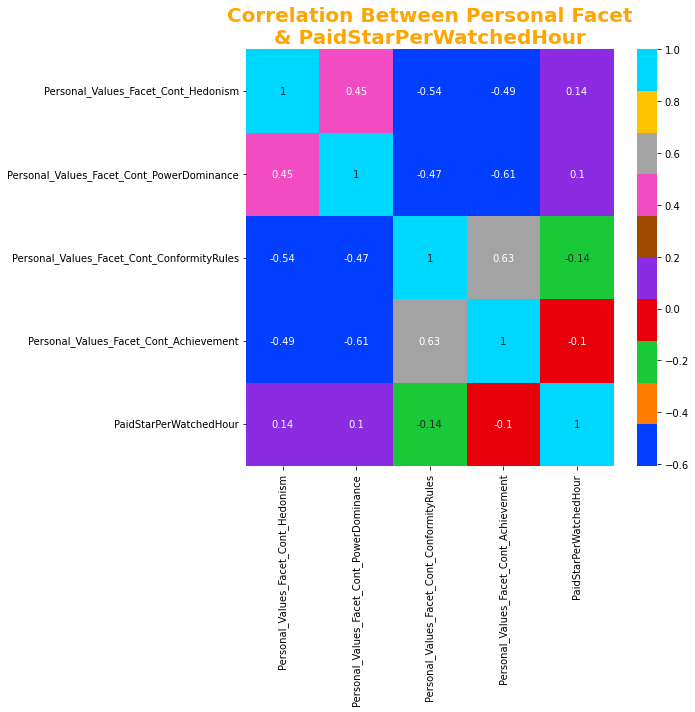

In [539]:
df_Personal_Facet_analysis_corr = df_Personal_Facet_analysis.corr()

fig, axs = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("bright",as_cmap=True)
sns.heatmap(data=df_Personal_Facet_analysis_corr, cmap=cmap, annot=True, ax=axs)
axs.set_title("Correlation Between Personal Facet\n& PaidStarPerWatchedHour", fontsize=20, fontweight="bold", color="orange")
plt.tight_layout()
plt.show()

In [540]:
print("Checking Basic Statistical Value = ?")
display(df_Personal_Facet_analysis.describe().T[["min","max"]])

Checking Basic Statistical Value = ?


,min,max
Personal_Values_Facet_Cont_Hedonism,0.203574,0.853163
Personal_Values_Facet_Cont_PowerDominance,0.313982,0.371439
Personal_Values_Facet_Cont_ConformityRules,0.244733,0.695133
Personal_Values_Facet_Cont_Achievement,0.254696,0.335083
PaidStarPerWatchedHour,0.000000,2.561621


In [541]:
df_Personal_Facet_analysis_columns = ["Personal_Values_Facet_Cont_Hedonism","Personal_Values_Facet_Cont_PowerDominance","Personal_Values_Facet_Cont_ConformityRules","Personal_Values_Facet_Cont_Achievement"]

fig, axs = plt.subplots(4, 1, figsize=(15, 15))
for i, column in enumerate(df_Personal_Facet_analysis_columns):
    sns.lineplot(data=df_Personal_Facet_analysis, x=column, y="PaidStarPerWatchedHour", ax=axs[i])
    axs[i].set_title("Correlation of {}\nand PaidStarPerWatchedHour".format(column), fontsize=20, fontweight="bold", color="orange")
    axs[i].set_xlabel(column, fontsize=15)
    axs[i].set_ylabel("PaidStarPerWatchedHour", fontsize=15)
plt.tight_layout()
plt.show()

### Data Analysis : df_Role_columns

In [ ]:
df_Role_columns = Features[Role_columns].copy()
display(df_Role_columns.head())

,Role_Director,Role_Craftsman,Role_Toastmaster,Role_Marshal,Role_Supplier,Role_Administrator,Role_Innovator,Role_Partygoer,Role_Guru,Role_Guardian,...,Role_Inventor,Role_Designer,Role_Deputy,Role_Strategist,Role_Inspector,Role_Companion,Role_Commander,Role_Activist,Role_Charismatic,Role_Curator
0,0.679339,0.453882,0.530887,0.620860,0.509514,0.572132,0.695563,0.674684,0.758008,0.560191,...,0.705475,0.533952,0.516859,0.783868,0.670467,0.541372,0.449807,0.514417,0.408444,0.524306
1,0.381432,0.325222,0.349459,0.486200,0.098237,0.274649,0.675918,0.351584,0.382031,0.280925,...,0.718745,0.488030,0.263292,0.549318,0.397981,0.230455,0.277163,0.286003,0.407624,0.100202
2,0.305979,0.784232,0.555618,0.177483,0.360728,0.488660,0.348778,0.319777,0.341425,0.644017,...,0.476994,0.715200,0.302466,0.437836,0.416392,0.463357,0.361047,0.401512,0.443453,0.070988
3,0.483526,0.187634,0.329684,0.738135,0.170067,0.341728,0.684566,0.343166,0.379951,0.253581,...,0.536129,0.353331,0.126136,0.538656,0.370693,0.218070,0.419304,0.290019,0.408994,0.214652
4,0.359326,0.472548,0.330917,0.203801,0.376474,0.348892,0.317387,0.465105,0.632996,0.523225,...,0.509520,0.439376,0.671446,0.535046,0.568810,0.415672,0.150856,0.319439,0.135650,0.324364


##### Making df_Personal_Cont_dataset

In [ ]:
df_Role_columns_dataset = df_Role_columns.join(Label)
display(df_Role_columns_dataset.head())

,Role_Director,Role_Craftsman,Role_Toastmaster,Role_Marshal,Role_Supplier,Role_Administrator,Role_Innovator,Role_Partygoer,Role_Guru,Role_Guardian,...,Role_Designer,Role_Deputy,Role_Strategist,Role_Inspector,Role_Companion,Role_Commander,Role_Activist,Role_Charismatic,Role_Curator,PaidStarPerWatchedHour
0,0.679339,0.453882,0.530887,0.620860,0.509514,0.572132,0.695563,0.674684,0.758008,0.560191,...,0.533952,0.516859,0.783868,0.670467,0.541372,0.449807,0.514417,0.408444,0.524306,0.004113
1,0.381432,0.325222,0.349459,0.486200,0.098237,0.274649,0.675918,0.351584,0.382031,0.280925,...,0.488030,0.263292,0.549318,0.397981,0.230455,0.277163,0.286003,0.407624,0.100202,0.002855
2,0.305979,0.784232,0.555618,0.177483,0.360728,0.488660,0.348778,0.319777,0.341425,0.644017,...,0.715200,0.302466,0.437836,0.416392,0.463357,0.361047,0.401512,0.443453,0.070988,0.003007
3,0.483526,0.187634,0.329684,0.738135,0.170067,0.341728,0.684566,0.343166,0.379951,0.253581,...,0.353331,0.126136,0.538656,0.370693,0.218070,0.419304,0.290019,0.408994,0.214652,0.005171
4,0.359326,0.472548,0.330917,0.203801,0.376474,0.348892,0.317387,0.465105,0.632996,0.523225,...,0.439376,0.671446,0.535046,0.568810,0.415672,0.150856,0.319439,0.135650,0.324364,0.001213


##### Correlation Betwen Role & PaidStarPerWatchedHour

In [ ]:
df_Role_columns_dataset_corr = df_Role_columns_dataset.corr()
display(df_Role_columns_dataset_corr)

,Role_Director,Role_Craftsman,Role_Toastmaster,Role_Marshal,Role_Supplier,Role_Administrator,Role_Innovator,Role_Partygoer,Role_Guru,Role_Guardian,...,Role_Designer,Role_Deputy,Role_Strategist,Role_Inspector,Role_Companion,Role_Commander,Role_Activist,Role_Charismatic,Role_Curator,PaidStarPerWatchedHour
Role_Director,1.000000,0.250066,0.480509,0.278980,0.668591,0.737617,0.442244,0.708604,0.710446,0.539675,...,0.122856,0.440816,0.790695,0.716550,0.506471,0.091010,0.286861,-0.041589,0.875805,-0.057563
Role_Craftsman,0.250066,1.000000,0.821315,-0.775053,0.606817,0.597020,-0.136939,0.644398,0.471384,0.873786,...,0.821811,0.818111,0.419484,0.702088,0.805149,-0.455562,0.379679,-0.018320,0.258008,0.068905
Role_Toastmaster,0.480509,0.821315,1.000000,-0.396871,0.749263,0.824213,0.306363,0.753277,0.466177,0.748307,...,0.822818,0.613119,0.467597,0.536931,0.914217,-0.012757,0.733213,0.425733,0.394697,0.032707
Role_Marshal,0.278980,-0.775053,-0.396871,1.000000,-0.241280,-0.100378,0.570769,-0.267607,-0.108628,-0.553337,...,-0.516158,-0.652962,0.082488,-0.379571,-0.463680,0.676628,-0.044059,0.281191,0.097414,-0.116337
Role_Supplier,0.668591,0.606817,0.749263,-0.241280,1.000000,0.909733,0.061006,0.786720,0.761536,0.816289,...,0.483223,0.639769,0.598973,0.677069,0.887061,0.058573,0.659491,0.070005,0.779160,-0.041266
Role_Administrator,0.737617,0.597020,0.824213,-0.100378,0.909733,1.000000,0.210562,0.668122,0.623076,0.809904,...,0.557519,0.470161,0.647163,0.648287,0.797460,0.260868,0.618556,0.279113,0.642331,-0.038182
Role_Innovator,0.442244,-0.136939,0.306363,0.570769,0.061006,0.210562,1.000000,0.350674,0.200406,-0.167788,...,0.204649,-0.089357,0.385222,-0.069396,0.176288,0.388837,0.515742,0.629861,0.221773,-0.080497
Role_Partygoer,0.708604,0.644398,0.753277,-0.267607,0.786720,0.668122,0.350674,1.000000,0.802774,0.674931,...,0.502462,0.845419,0.658609,0.726671,0.887540,-0.305481,0.606617,-0.011084,0.806864,-0.007767
Role_Guru,0.710446,0.471384,0.466177,-0.108628,0.761536,0.623076,0.200406,0.802774,1.000000,0.700613,...,0.402583,0.731264,0.886732,0.798600,0.674648,-0.179969,0.451853,-0.187766,0.831133,-0.085674
Role_Guardian,0.539675,0.873786,0.748307,-0.553337,0.816289,0.809904,-0.167788,0.674931,0.700613,1.000000,...,0.663692,0.785309,0.660960,0.881602,0.793839,-0.259834,0.349510,-0.133447,0.544546,0.003984


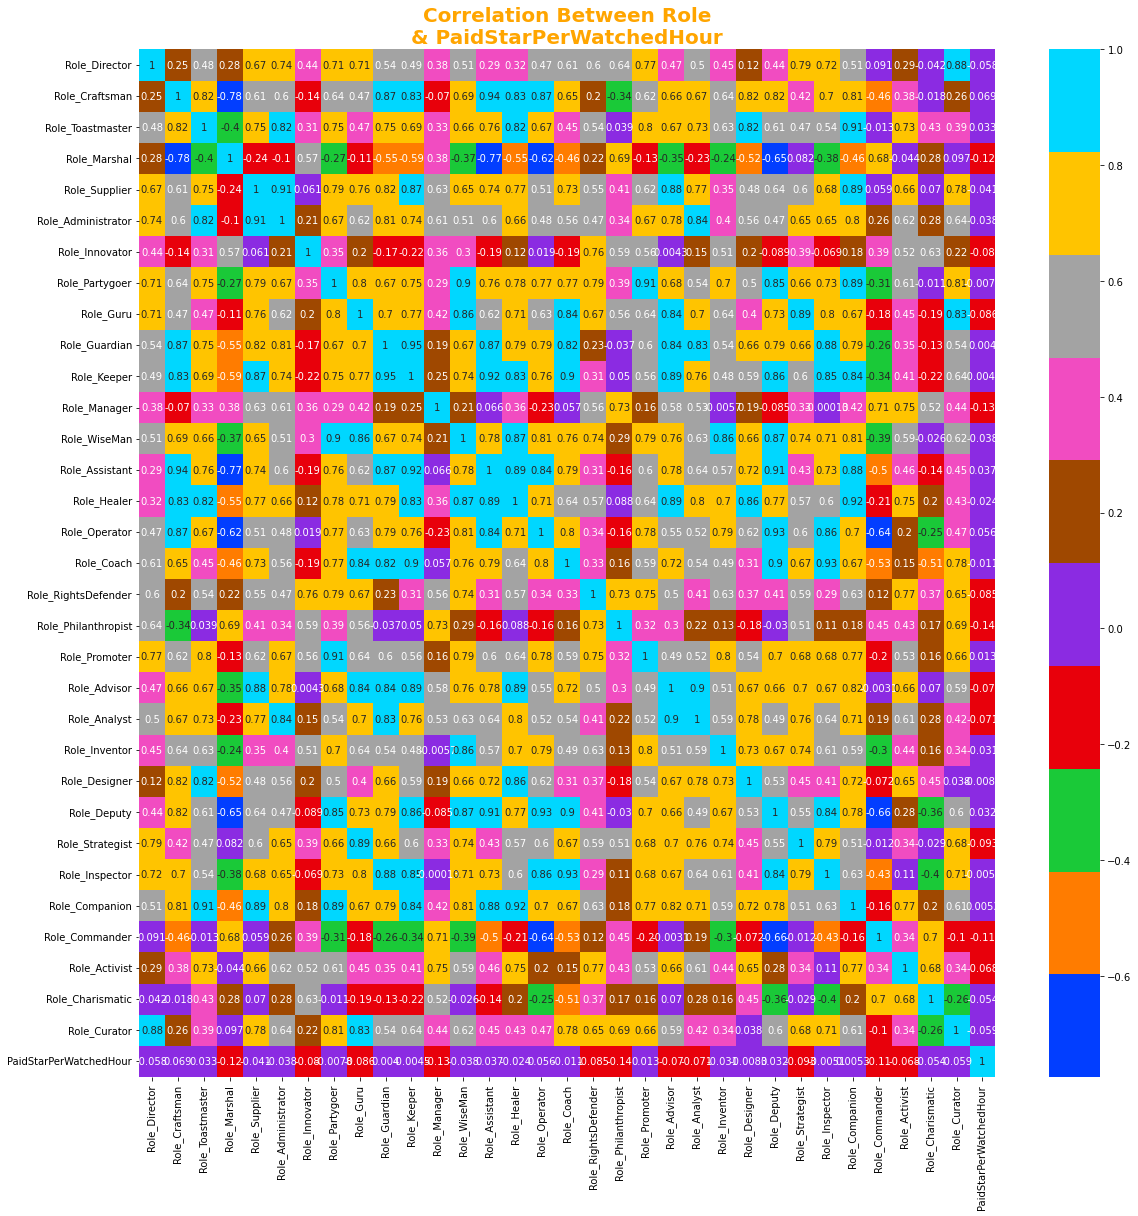

In [ ]:
fig, axs = plt.subplots(figsize=(17, 17))
cmap = sns.color_palette("bright",as_cmap=True)
sns.heatmap(data=df_Role_columns_dataset_corr, cmap=cmap, annot=True, ax=axs)
axs.set_title("Correlation Between Role\n& PaidStarPerWatchedHour", fontsize=20, fontweight="bold", color="orange")
plt.tight_layout()
plt.show()

### Data Analysis : df_Temperament_columns

In [ ]:
df_Temperament_columns = Features[Temperament_columns].copy()
display(df_Temperament_columns.head())

,Temperament_Choleric,Temperament_Sanguine,Temperament_Diligent,Temperament_Energetic,Temperament_Stable,Temperament_Melancholic,Temperament_Phlegmatic,Temperament_Unstable,Temperament_Centric
0,0.0,0.25,0.125,0.125,0.750,0.00,0.25,0.500,0.625
1,0.0,0.50,0.250,0.000,0.625,0.25,0.75,0.125,0.125
2,0.5,0.00,0.500,0.000,0.000,1.00,0.50,0.500,0.000
3,0.5,1.00,0.000,0.500,0.500,0.00,0.50,0.000,0.000
4,0.0,0.25,0.625,0.125,0.250,0.50,0.75,0.000,0.125


In [ ]:
print("Dimension of df_Personal_Cont = %d Rows & %d Columns"%df_Personal_Cont.shape)

Dimension of df_Personal_Cont = 621 Rows & 4 Columns


##### Making df_Temperament_columns_dataset

In [ ]:
df_Temperament_columns_dataset = df_Temperament_columns.join(Label)
display(df_Temperament_columns_dataset.head())

,Temperament_Choleric,Temperament_Sanguine,Temperament_Diligent,Temperament_Energetic,Temperament_Stable,Temperament_Melancholic,Temperament_Phlegmatic,Temperament_Unstable,Temperament_Centric,PaidStarPerWatchedHour
0,0.0,0.25,0.125,0.125,0.750,0.00,0.25,0.500,0.625,0.004113
1,0.0,0.50,0.250,0.000,0.625,0.25,0.75,0.125,0.125,0.002855
2,0.5,0.00,0.500,0.000,0.000,1.00,0.50,0.500,0.000,0.003007
3,0.5,1.00,0.000,0.500,0.500,0.00,0.50,0.000,0.000,0.005171
4,0.0,0.25,0.625,0.125,0.250,0.50,0.75,0.000,0.125,0.001213


##### Correlation Betwen Temperament_columns & PaidStarPerWatchedHour

In [ ]:
df_Temperament_columns_dataset_corr = df_Temperament_columns_dataset.corr()
display(df_Temperament_columns_dataset_corr)

,Temperament_Choleric,Temperament_Sanguine,Temperament_Diligent,Temperament_Energetic,Temperament_Stable,Temperament_Melancholic,Temperament_Phlegmatic,Temperament_Unstable,Temperament_Centric,PaidStarPerWatchedHour
Temperament_Choleric,1.000000,0.453850,-0.467813,0.474334,-0.328577,-0.114125,-0.491969,0.074432,-0.342747,-0.058767
Temperament_Sanguine,0.453850,1.000000,-0.656512,0.217033,0.361404,-0.578036,0.202978,-0.430038,-0.567036,-0.071179
Temperament_Diligent,-0.467813,-0.656512,1.000000,0.199842,-0.614426,0.480294,0.112349,-0.321987,0.366702,0.101493
Temperament_Energetic,0.474334,0.217033,0.199842,1.000000,-0.532733,-0.465901,-0.606289,-0.393944,0.304394,0.020246
Temperament_Stable,-0.328577,0.361404,-0.614426,-0.532733,1.000000,-0.426700,0.321135,0.316002,0.002939,-0.051039
Temperament_Melancholic,-0.114125,-0.578036,0.480294,-0.465901,-0.426700,1.000000,0.354758,0.156343,-0.265343,0.037564
Temperament_Phlegmatic,-0.491969,0.202978,0.112349,-0.606289,0.321135,0.354758,1.000000,-0.415421,-0.577817,0.006256
Temperament_Unstable,0.074432,-0.430038,-0.321987,-0.393944,0.316002,0.156343,-0.415421,1.000000,0.390316,-0.025651
Temperament_Centric,-0.342747,-0.567036,0.366702,0.304394,0.002939,-0.265343,-0.577817,0.390316,1.000000,0.053928
PaidStarPerWatchedHour,-0.058767,-0.071179,0.101493,0.020246,-0.051039,0.037564,0.006256,-0.025651,0.053928,1.000000


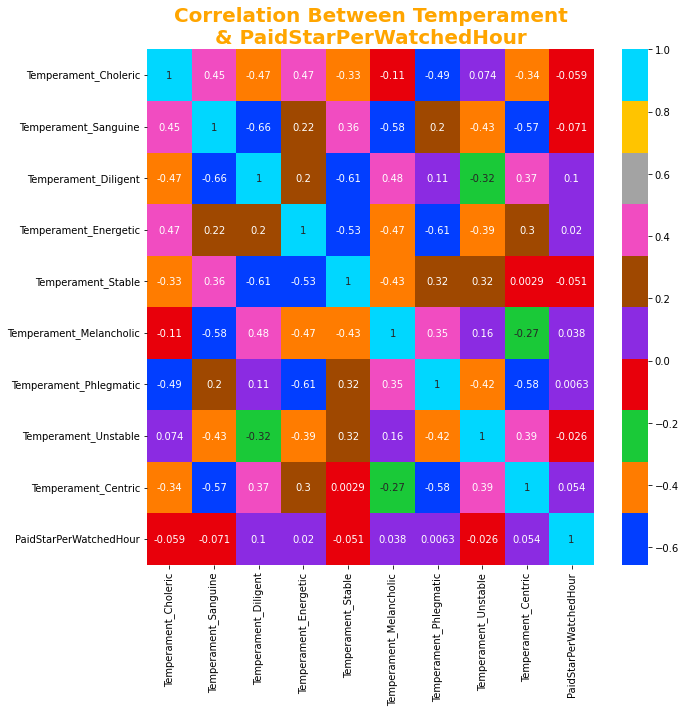

In [ ]:
fig, axs = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("bright",as_cmap=True)
sns.heatmap(data=df_Temperament_columns_dataset_corr, cmap=cmap, annot=True, ax=axs)
axs.set_title("Correlation Between Temperament\n& PaidStarPerWatchedHour", fontsize=20, fontweight="bold", color="orange")
plt.tight_layout()
plt.show()

### Data Analysis : df_Self_columns

In [ ]:
df_Self_columns = Features[Self_columns].copy()
display(df_Self_columns.head())

,Self_Esteem_Cont_SEDiscrepancyResponsibility,Self_Esteem_Cont_SELevel,Self_Esteem_Cont_SELevelResponsibility,Self_Esteem_Cont_SEAspirationResponsibility,Self_Esteem_Cont_SELevelAchievements,Self_Esteem_Cont_SEDiscrepancySociability,Self_Esteem_Cont_SEAspiration,Self_Esteem_Cont_SEDiscrepancyAchievements,Self_Esteem_Cont_SEAspirationSociability,Self_Esteem_Cont_SEAspirationAchievements,...,Self_Esteem_Cont_SEDiscrepancy,Self_Esteem_Cont_SEAspirationIntelligence,Self_Esteem_Cont_SELevelSociability,Self_Esteem_Cont_SEDiscrepancyAppearance,Self_Esteem_Cont_SEDiscrepancyOriginality,Self_Esteem_Cont_SELevelOriginality,Self_Esteem_Cont_SEAspirationAppearance,Self_Esteem_Cont_SEDiscrepancyIntelligence,Self_Esteem_Cont_SELevelAppearance,Self_Esteem_Cont_SELevelIntelligence
0,0.496688,0.462912,0.679427,0.721495,0.605858,0.473335,0.881936,0.544263,0.720348,0.808914,...,0.363321,0.827353,0.785880,0.606057,0.556407,0.728769,0.648751,0.473907,0.684412,0.803920
1,0.557879,0.386516,0.743407,0.534425,0.490160,0.579283,0.860851,0.583342,0.606514,0.751732,...,0.282683,0.873790,0.747270,0.619994,0.559899,0.771001,0.690168,0.482889,0.635493,0.751291
2,0.395199,0.568077,0.555626,0.568014,0.189999,0.510046,0.805830,0.573285,0.840707,0.894843,...,0.624829,0.777473,0.585201,0.527887,0.639857,0.546902,0.850414,0.354271,0.398686,0.759900
3,0.536235,0.425361,0.674491,0.712327,0.378579,0.504088,0.886073,0.466593,0.745220,0.877081,...,0.325990,0.839085,0.832012,0.473965,0.574751,0.747797,0.629667,0.481676,0.703669,0.734010
4,0.299370,0.781216,0.800546,0.743872,0.628431,0.423613,0.829868,0.445069,0.892338,0.941655,...,0.434654,0.717338,0.695167,0.406912,0.426957,0.618217,0.861587,0.233880,0.439668,0.814530


##### Making df_Self_Esteem_dataset

In [ ]:
df_Self_Esteem_dataset = df_Self_columns.join(Label)
display(df_Self_Esteem_dataset.head())

,Self_Esteem_Cont_SEDiscrepancyResponsibility,Self_Esteem_Cont_SELevel,Self_Esteem_Cont_SELevelResponsibility,Self_Esteem_Cont_SEAspirationResponsibility,Self_Esteem_Cont_SELevelAchievements,Self_Esteem_Cont_SEDiscrepancySociability,Self_Esteem_Cont_SEAspiration,Self_Esteem_Cont_SEDiscrepancyAchievements,Self_Esteem_Cont_SEAspirationSociability,Self_Esteem_Cont_SEAspirationAchievements,...,Self_Esteem_Cont_SEAspirationIntelligence,Self_Esteem_Cont_SELevelSociability,Self_Esteem_Cont_SEDiscrepancyAppearance,Self_Esteem_Cont_SEDiscrepancyOriginality,Self_Esteem_Cont_SELevelOriginality,Self_Esteem_Cont_SEAspirationAppearance,Self_Esteem_Cont_SEDiscrepancyIntelligence,Self_Esteem_Cont_SELevelAppearance,Self_Esteem_Cont_SELevelIntelligence,PaidStarPerWatchedHour
0,0.496688,0.462912,0.679427,0.721495,0.605858,0.473335,0.881936,0.544263,0.720348,0.808914,...,0.827353,0.785880,0.606057,0.556407,0.728769,0.648751,0.473907,0.684412,0.803920,0.004113
1,0.557879,0.386516,0.743407,0.534425,0.490160,0.579283,0.860851,0.583342,0.606514,0.751732,...,0.873790,0.747270,0.619994,0.559899,0.771001,0.690168,0.482889,0.635493,0.751291,0.002855
2,0.395199,0.568077,0.555626,0.568014,0.189999,0.510046,0.805830,0.573285,0.840707,0.894843,...,0.777473,0.585201,0.527887,0.639857,0.546902,0.850414,0.354271,0.398686,0.759900,0.003007
3,0.536235,0.425361,0.674491,0.712327,0.378579,0.504088,0.886073,0.466593,0.745220,0.877081,...,0.839085,0.832012,0.473965,0.574751,0.747797,0.629667,0.481676,0.703669,0.734010,0.005171
4,0.299370,0.781216,0.800546,0.743872,0.628431,0.423613,0.829868,0.445069,0.892338,0.941655,...,0.717338,0.695167,0.406912,0.426957,0.618217,0.861587,0.233880,0.439668,0.814530,0.001213


##### Correlation Betwen Self_Esteem & PaidStarPerWatchedHour

In [ ]:
df_Self_Esteem_dataset_corr = df_Self_Esteem_dataset.corr()
display(df_Self_Esteem_dataset_corr)

,Self_Esteem_Cont_SEDiscrepancyResponsibility,Self_Esteem_Cont_SELevel,Self_Esteem_Cont_SELevelResponsibility,Self_Esteem_Cont_SEAspirationResponsibility,Self_Esteem_Cont_SELevelAchievements,Self_Esteem_Cont_SEDiscrepancySociability,Self_Esteem_Cont_SEAspiration,Self_Esteem_Cont_SEDiscrepancyAchievements,Self_Esteem_Cont_SEAspirationSociability,Self_Esteem_Cont_SEAspirationAchievements,...,Self_Esteem_Cont_SEAspirationIntelligence,Self_Esteem_Cont_SELevelSociability,Self_Esteem_Cont_SEDiscrepancyAppearance,Self_Esteem_Cont_SEDiscrepancyOriginality,Self_Esteem_Cont_SELevelOriginality,Self_Esteem_Cont_SEAspirationAppearance,Self_Esteem_Cont_SEDiscrepancyIntelligence,Self_Esteem_Cont_SELevelAppearance,Self_Esteem_Cont_SELevelIntelligence,PaidStarPerWatchedHour
Self_Esteem_Cont_SEDiscrepancyResponsibility,1.000000,-0.626993,0.243237,0.466379,0.536271,0.304714,-0.105800,-0.058033,-0.580741,-0.371694,...,0.246831,0.584411,0.249279,0.114227,0.319447,-0.605682,0.767781,0.677184,0.284731,0.004851
Self_Esteem_Cont_SELevel,-0.626993,1.000000,-0.137832,-0.359389,-0.346981,-0.344068,0.115525,-0.091359,0.549255,0.420596,...,-0.178063,-0.484319,-0.350574,-0.297209,-0.315626,0.534740,-0.681059,-0.571846,-0.166799,0.011574
Self_Esteem_Cont_SELevelResponsibility,0.243237,-0.137832,1.000000,0.297829,0.355009,0.063271,0.127115,-0.118435,-0.192132,-0.068541,...,0.234005,0.334025,0.060700,-0.047414,0.178727,-0.254120,0.285949,0.348462,0.201708,-0.087183
Self_Esteem_Cont_SEAspirationResponsibility,0.466379,-0.359389,0.297829,1.000000,0.544846,0.197552,0.037222,-0.031548,-0.463586,-0.325936,...,0.324528,0.640024,0.231342,0.034235,0.382269,-0.503168,0.619672,0.575082,0.400475,-0.079741
Self_Esteem_Cont_SELevelAchievements,0.536271,-0.346981,0.355009,0.544846,1.000000,0.200487,0.070610,-0.175414,-0.495338,-0.334087,...,0.338457,0.741884,0.198292,-0.038446,0.342061,-0.618548,0.680616,0.695174,0.511821,-0.093655
Self_Esteem_Cont_SEDiscrepancySociability,0.304714,-0.344068,0.063271,0.197552,0.200487,1.000000,-0.033228,0.047875,-0.272308,-0.144804,...,0.057303,0.252049,0.096306,0.241199,0.087684,-0.289005,0.341964,0.279138,0.100281,-0.004079
Self_Esteem_Cont_SEAspiration,-0.105800,0.115525,0.127115,0.037222,0.070610,-0.033228,1.000000,-0.020374,0.064052,0.067561,...,0.110409,0.110882,0.036198,-0.047358,0.092231,-0.054223,0.001516,0.063498,0.128042,-0.039866
Self_Esteem_Cont_SEDiscrepancyAchievements,-0.058033,-0.091359,-0.118435,-0.031548,-0.175414,0.047875,-0.020374,1.000000,0.021740,-0.058291,...,-0.009312,-0.111610,-0.026082,0.135708,0.035398,0.059584,-0.049288,-0.074791,-0.029086,-0.074224
Self_Esteem_Cont_SEAspirationSociability,-0.580741,0.549255,-0.192132,-0.463586,-0.495338,-0.272308,0.064052,0.021740,1.000000,0.403614,...,-0.316965,-0.559630,-0.285768,-0.163715,-0.394674,0.559393,-0.697579,-0.584671,-0.330005,0.067745
Self_Esteem_Cont_SEAspirationAchievements,-0.371694,0.420596,-0.068541,-0.325936,-0.334087,-0.144804,0.067561,-0.058291,0.403614,1.000000,...,-0.211789,-0.436981,-0.227853,-0.074998,-0.307172,0.346871,-0.484760,-0.425632,-0.200813,0.040028


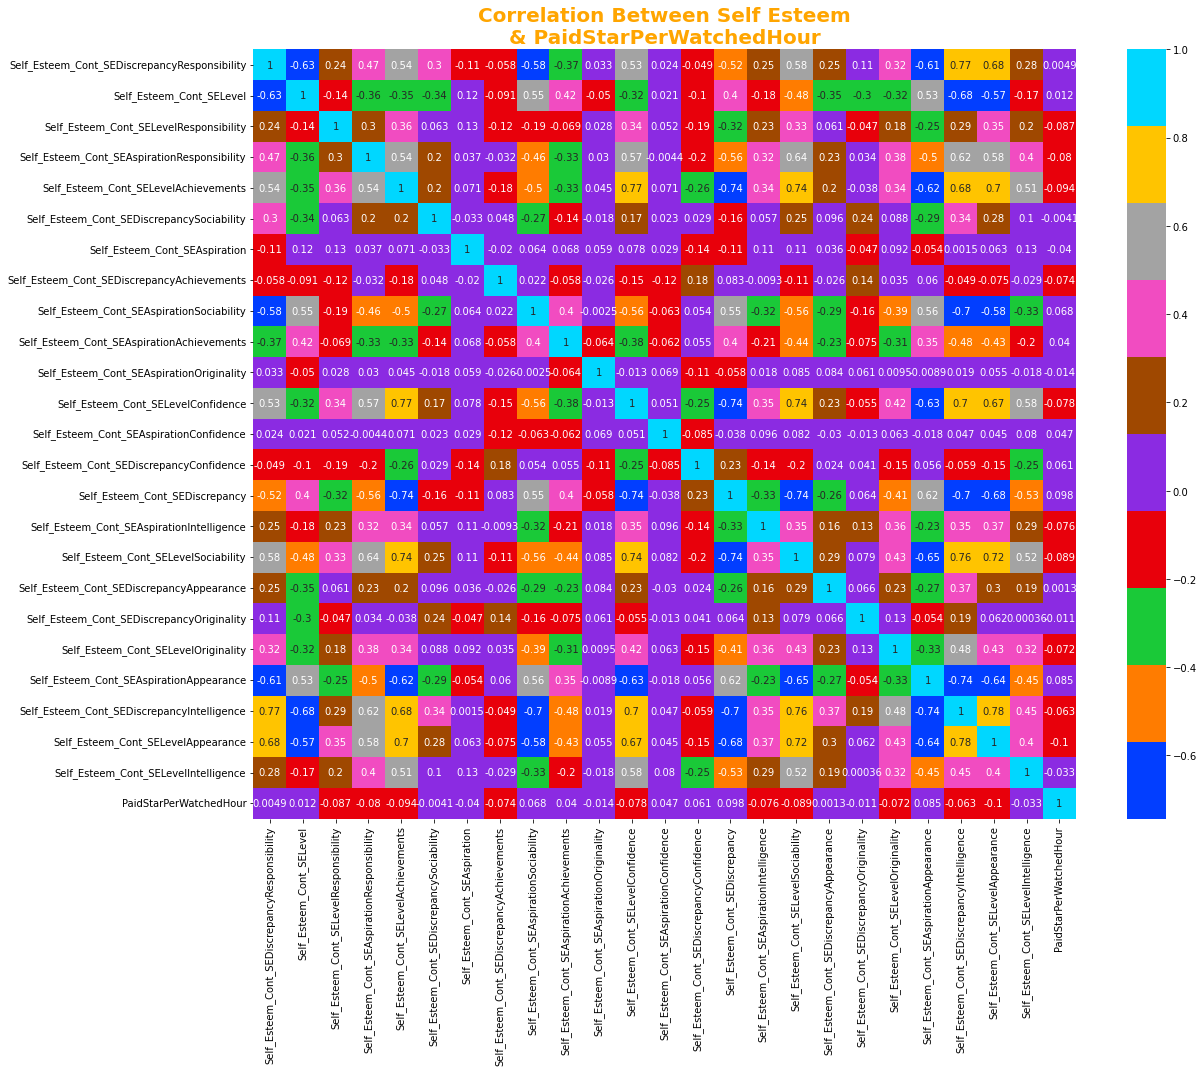

In [ ]:
fig, axs = plt.subplots(figsize=(18, 15))
cmap = sns.color_palette("bright",as_cmap=True)
sns.heatmap(data=df_Self_Esteem_dataset_corr, cmap=cmap, annot=True, ax=axs)
axs.set_title("Correlation Between Self Esteem\n& PaidStarPerWatchedHour", fontsize=20, fontweight="bold", color="orange")
plt.tight_layout()
plt.show()